In [1]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/16/bf/7c0c89ff8ba53592b9cb5157f70e90d8bbb04d60094fc4f10035e158b981/yfinance-0.2.66-py2.py3-none-any.whl.metadata
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/ba/d0/d482c39cee2ab2978a892558cf130681d4574ea208e162da8958b31e9250/frozendict-2.4.6-py312-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.7 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.2 MB/s eta 0:00:02
     ---- ------------


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import yfinance as yf 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date

In [74]:
tickers = ['MSFT', 'GOOG']

In [75]:
#Fetch last 5 years data of Apple and Microsoft
data = yf.download(tickers, start='2018-01-01', end=date.today())

[*********************100%***********************]  2 of 2 completed


In [76]:
#Display first few rows
print(data.head())

Price           Close                  High                   Low             \
Ticker           GOOG       MSFT       GOOG       MSFT       GOOG       MSFT   
Date                                                                           
2018-01-02  53.059353  79.633507  53.156006  79.967051  52.074393  79.216580   
2018-01-03  53.930225  80.004120  54.120042  80.152365  52.970174  79.652049   
2018-01-04  54.125519  80.708260  54.482737  81.217843  54.006048  80.207944   
2018-01-05  54.914188  81.708916  55.014829  81.912749  54.404518  81.004766   
2018-01-08  55.148846  81.792274  55.364570  82.070230  54.883799  81.162248   

Price            Open               Volume            
Ticker           GOOG       MSFT      GOOG      MSFT  
Date                                                  
2018-01-02  52.229335  79.800279  24752000  22483800  
2018-01-03  53.024977  79.735431  28604000  26061400  
2018-01-04  54.205234  80.226471  20092000  21912000  
2018-01-05  54.504163  81.217

In [77]:
#Display last few rows
print(data.tail())

Price            Close                    High                     Low  \
Ticker            GOOG        MSFT        GOOG        MSFT        GOOG   
Date                                                                     
2025-01-03  193.130005  423.350006  194.500000  424.029999  191.350006   
2025-01-06  197.960007  427.850006  199.559998  434.320007  195.059998   
2025-01-07  196.710007  422.369995  202.139999  430.649994  195.940002   
2025-01-08  195.389999  424.559998  197.639999  426.970001  193.750000   
2025-01-10  193.169998  418.950012  197.619995  424.709991  191.600006   

Price                         Open                Volume            
Ticker            MSFT        GOOG        MSFT      GOOG      MSFT  
Date                                                                
2025-01-03  419.540009  192.725006  421.079987  12875000  16662900  
2025-01-06  425.480011  195.149994  428.000000  19483300  20573600  
2025-01-07  420.799988  198.270004  429.000000  16966800  1813

In [78]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats
import numpy as np
from datetime import date

In [79]:
ticker = 'MSFT'
start_date = '2001-01-01'
end_date = date.today()

# Fetch the historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           MSFT       MSFT       MSFT       MSFT       MSFT
Date                                                             
2001-01-02  13.345667  13.845649  13.191826  13.576428   82413200
2001-01-03  14.749457  15.037908  13.268743  13.287973  135962200
2001-01-04  14.903307  15.537899  14.422555  14.711006  112397000
2001-01-05  15.114835  15.345596  14.634083  14.922534   93414600
2001-01-08  15.057140  15.307131  14.364858  15.057140   79817600


ADJUSTED CLOSING PRICE- Price after accounting for events like dividends and ticker splits.

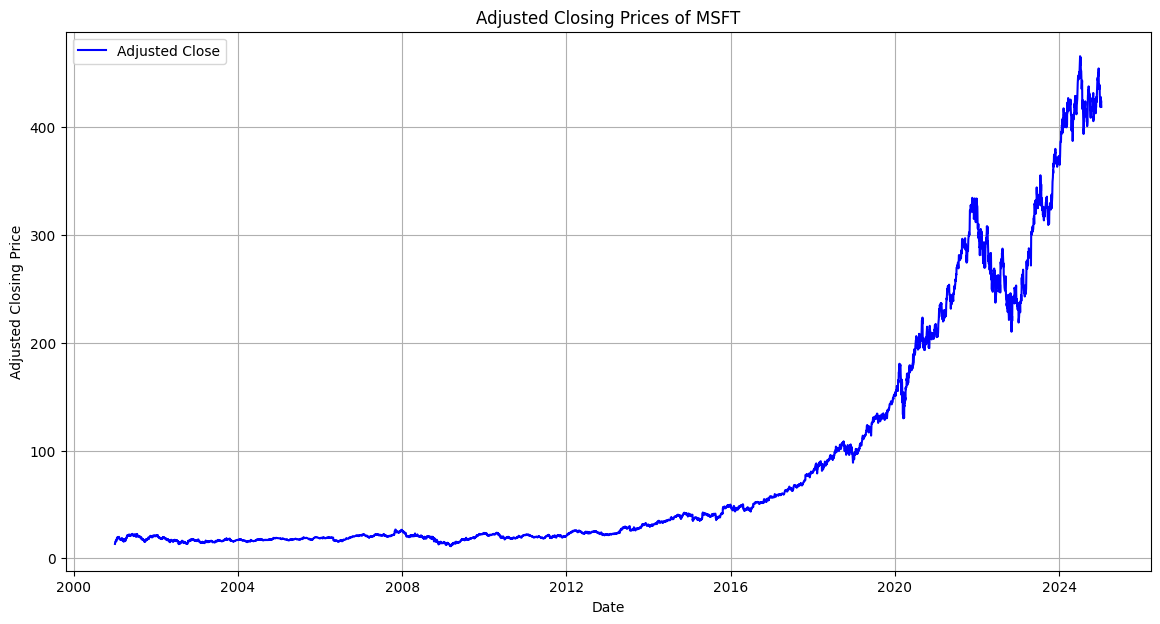

In [80]:
#Plot the Adjusted Closing Price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Adjusted Close', color='blue')
plt.title('Adjusted Closing Prices of MSFT')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

HISTOGRAM AND DENSITY CURVE FOR ADJUSTED CLOSING PRICE

x-axis represents the range of adjusted closing prices, and the y-axis shows how many times the ticker closed at each price or within each price range.
This helps to understand the overall price movement, where the ticker typically closed, and if there were any frequent price points (peaks) or large price changes 

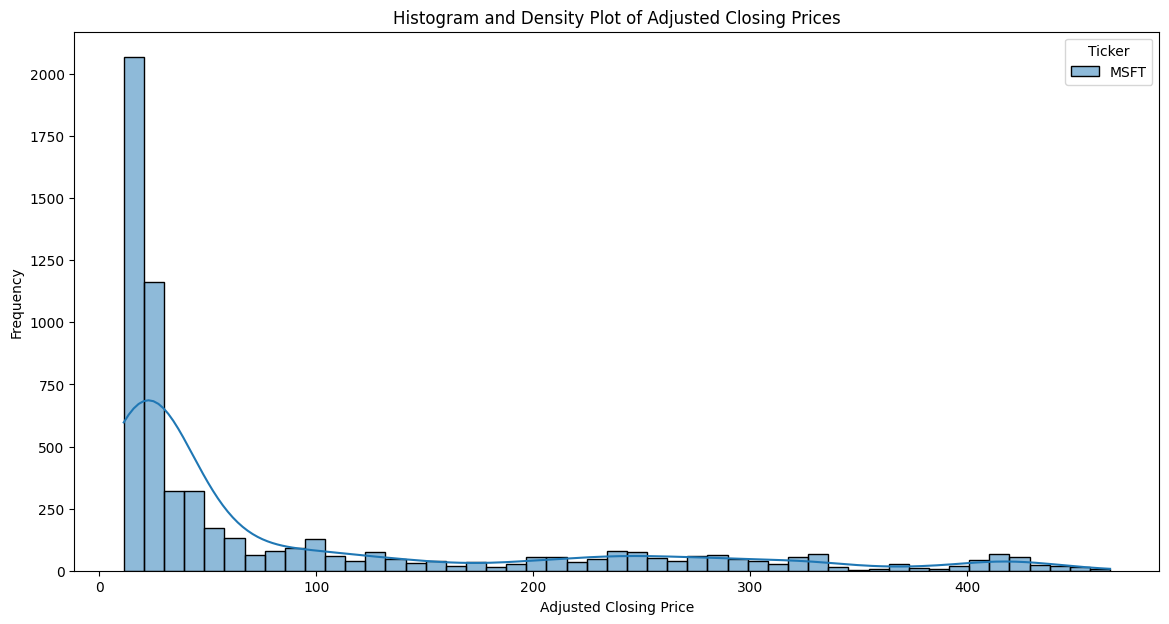

In [81]:
plt.figure(figsize=(14, 7))
sns.histplot(data['Close'], kde=True)
plt.title('Histogram and Density Plot of Adjusted Closing Prices')
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Frequency')
plt.show()

BOX PLOT AND VIOLIN PLOT:

Box Plot shows-

Focuses on the key statistics (median, quartiles, and outliers) of the adjusted closing price distribution.

Violin Plot shows- 

Shows both the spread and the shape of the data, along with the central tendency and potential outliers. The distribution shape (whether the ticker’s adjusted closing price is skewed, bimodal, etc.).

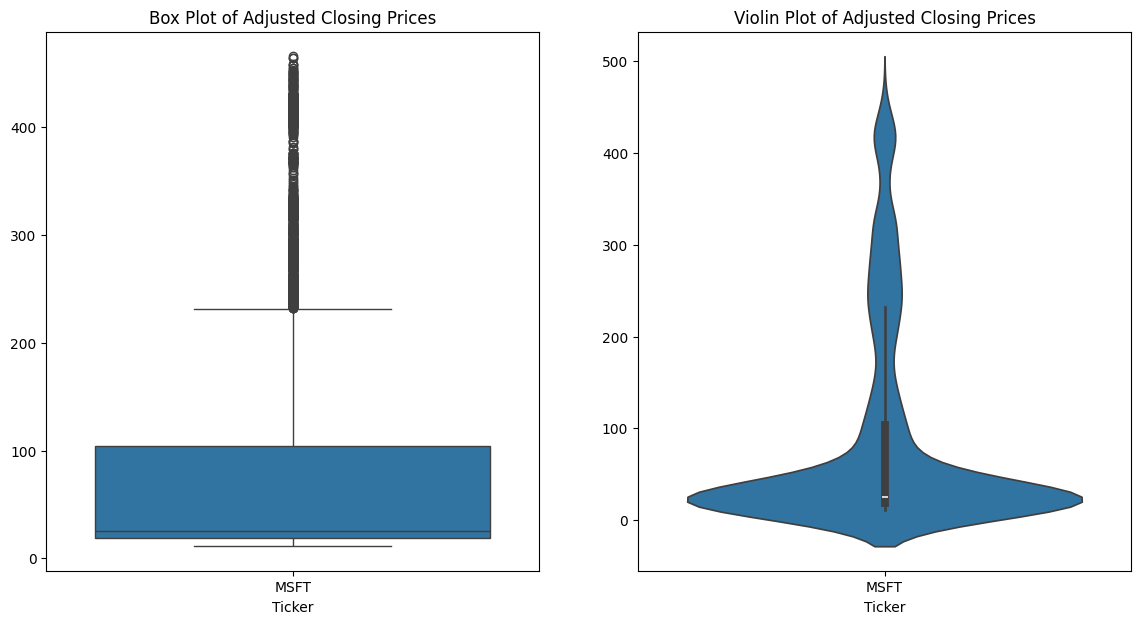

In [82]:
plt.figure(figsize=(14, 7))

# Box Plot
plt.subplot(121)
sns.boxplot(data['Close'])
plt.title('Box Plot of Adjusted Closing Prices')

# Violin Plot
plt.subplot(122)
sns.violinplot(data['Close'])
plt.title('Violin Plot of Adjusted Closing Prices')

plt.show()

Taking log of the prices helps to normalize the data, remove outliers and reduce skewness, making it easier to observe patterns and draw insights from the distribution.

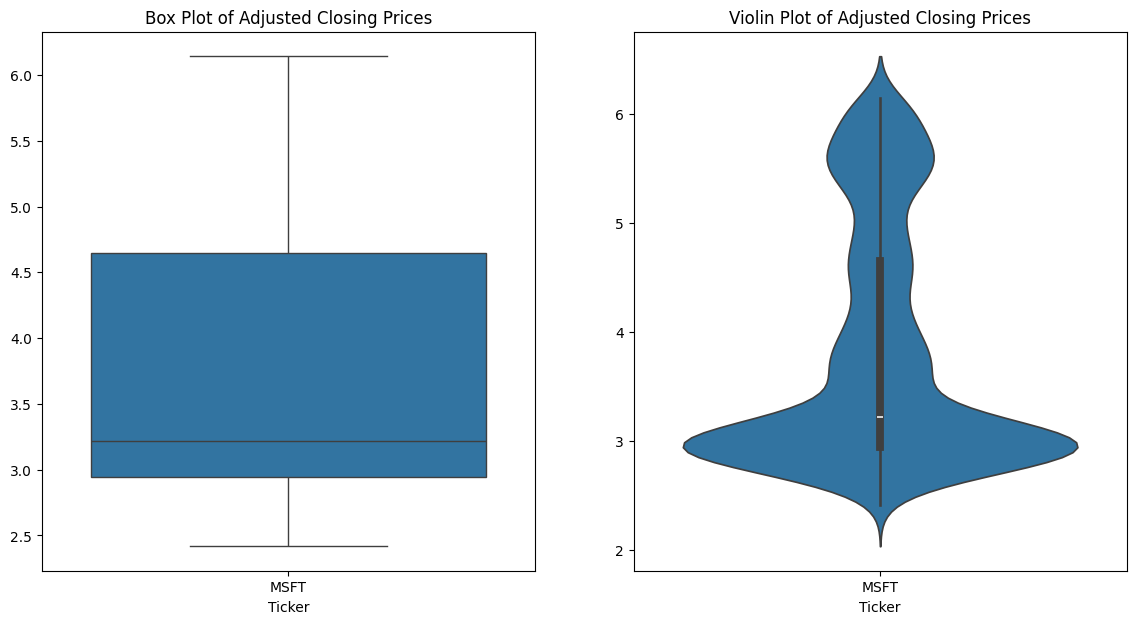

In [83]:
plt.figure(figsize=(14, 7))

# Box Plot
plt.subplot(121)
sns.boxplot(np.log(data['Close']))
plt.title('Box Plot of Adjusted Closing Prices')

# Violin Plot
plt.subplot(122)
sns.violinplot(np.log(data['Close']))
plt.title('Violin Plot of Adjusted Closing Prices')

plt.show()

MEAN, VARIANCE, STANDARD DEVIATION, SKEWNESS, KURTOSIS

Mean: The average value of a dataset, calculated by summing all values and dividing by the number of values.

Variance: A measure of how much the data points differ from the mean, representing the spread of the data.

Standard Deviation: The square root of the variance, indicating how much data points deviate from the mean on average.

Skewness: A measure of the asymmetry or lopsidedness of the data distribution.
(>0 right skewed, <0 left skewed, approximately 0 symmetric)

Kurtosis: A measure of the "tailedness" or sharpness of the peak in the data distribution, indicating the presence of outliers.

In [84]:
mean = data['Close'].mean()
variance = data['Close'].var()
std_dev = data['Close'].std()
skewness = data['Close'].skew()
kurtosis = data['Close'].kurt()

#print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}, Skewness: {skewness}, Kurtosis: {kurtosis}")
print(f"Mean: {mean.values[0]}")
print(f"Variance: {variance.iloc[0]}")
print(f"Standard Deviation: {std_dev.iloc[0]}")
print(f"Skewness: {skewness.iloc[0]}")
print(f"Kurtosis: {kurtosis.iloc[0]}")

Mean: 88.34242912619473
Variance: 12823.32849216293
Standard Deviation: 113.24013640120242
Skewness: 1.6659864996691276
Kurtosis: 1.5954984446957274


MISSING VALUES- Handling missing values using forward fill


In [85]:
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)  #no missing values here

data_ffill = data.ffill()

missing_values_after_ffill = data_ffill.isnull().sum()
print("Missing values after forward fill:\n", missing_values_after_ffill)


Missing values before handling:
 Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64
Missing values after forward fill:
 Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


## AUTOCORRELATION AND PARTIAL AUTOCORRELATION:

Autocorrelation- measures the relationship between a time series and its own past values (lags). It includes the impact of all previous lags.

Partial Autocorrelation-  Focuses only on the direct relationship with a specific lag, ignoring indirect influences from intermediate lags.

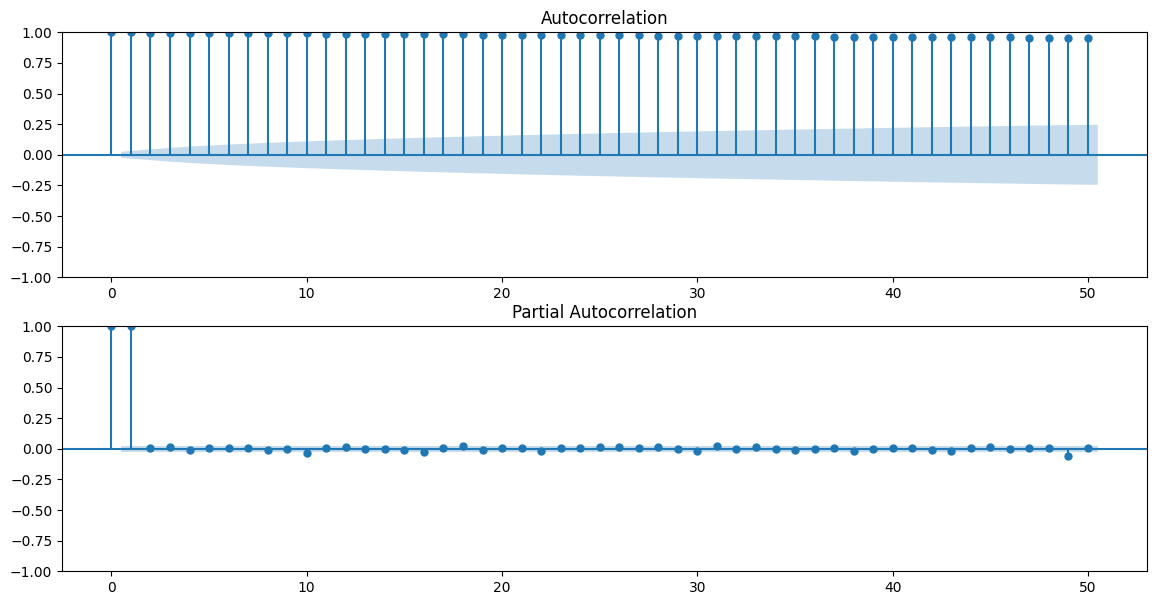

In [86]:
plt.figure(figsize=(14, 7))
plt.subplot(211)
plot_acf(data_ffill['Close'].dropna(), lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(data_ffill['Close'].dropna(), lags=50, ax=plt.gca())
plt.show()

The autocorrelation gradually decreases with lags, indicating that the series likely has a trend or is non-stationary.

There is a strong positive partial autocorrelation at lag 1, indicating that the immediate past value directly influences the current value.
Drop After Lag 1:
The PACF drops quickly after lag 1 and stabilizes around zero for higher lags. This suggests that only the immediate lag is important, and the influence of other lags is mediated through the first lag.


DESCRIPTIVE STATISTICS SUMMARY

In [87]:
desc_stats = data.describe()
print(desc_stats)

Price         Close         High          Low         Open        Volume
Ticker         MSFT         MSFT         MSFT         MSFT          MSFT
count   6043.000000  6043.000000  6043.000000  6043.000000  6.043000e+03
mean      88.342429    89.176514    87.438262    88.324289  4.872200e+07
std      113.240136   114.250607   112.130443   113.234506  2.971203e+07
min       11.220716    11.568821    11.013339    11.257748  7.164500e+06
25%       18.969725    19.153783    18.784804    18.968751  2.672940e+07
50%       24.967764    25.158365    24.728210    24.976233  4.316590e+07
75%      104.102493   104.836316   102.718696   104.032120  6.306405e+07
max      465.786438   466.573450   462.698189   465.228569  5.910522e+08


In [88]:
print(f"Skewness: {skewness.iloc[0]}")
print(f"Kurtosis: {kurtosis.iloc[0]}")

Skewness: 1.6659864996691276
Kurtosis: 1.5954984446957274


In [89]:
# Fetch MSFT and GOOG data from Yahoo Finance
ticker_msft = "MSFT"
ticker_goog = "GOOG"

# Download the data
data_msft = yf.download(ticker_msft, start="2005-08-12", end=date.today())
data_goog = yf.download(ticker_goog, start="2005-08-12", end=date.today())
data_msft.columns = data_msft.columns.get_level_values(0)
data_goog.columns = data_goog.columns.get_level_values(0)

# Display the first few rows of each dataset to confirm successful download
print(data_msft.head())
print(data_goog.head())
data_msft.dropna(inplace=True)
data_goog.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Date                                                            
2005-08-12  18.889053  18.951901  18.784308  18.910003  52006500
2005-08-15  19.001110  19.120173  18.692947  18.896054  45976600
2005-08-16  18.727962  19.008111  18.699948  18.931071  46894600
2005-08-17  18.875050  19.015123  18.671941  18.784000  52413100
2005-08-18  18.783997  18.966094  18.769989  18.833022  40861900
Price          Close      High       Low      Open     Volume
Date                                                         
2005-08-12  7.190118  7.202031  6.989593  7.032280  264423423
2005-08-15  7.048162  7.265811  7.042454  7.192103  328213631
2005-08-16  7.089111  7.142220  7.031782  7.070002  285433881
2005-08-17  7.075461  7.111943  7.048162  7.085637  155914222
2005-08-18  6.948644  6.961301  6.824805  6.847389  476692087


MSFT and GOOG CLOSING PRICES OVER TIME:

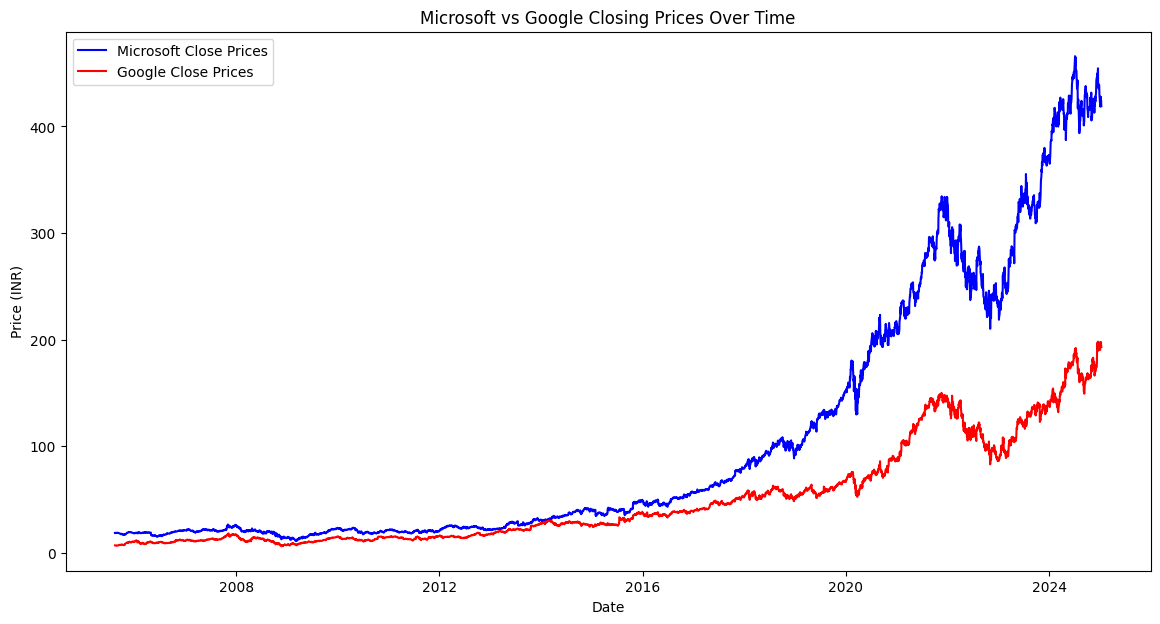

In [90]:
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close'], label='Microsoft Close Prices', color='blue')
plt.plot(data_goog['Close'], label='Google Close Prices', color='red')
plt.title('Microsoft vs Google Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

## COVARIANCE, PEARSON CORRELATION AND SPEARMAN CORRELATION

Covariance: Measures how two variables vary together. (+ve variables increases together, -ve as one increases other decreases, 0 no relation)

Pearson Correlation: Measures the linear relationship between two variables. (normally distributed data)

Spearman Correlation: Measures the monotonic relationship between two variables(linear or non-linear). If one increases, the other consistently in or decreases.

In [91]:
#Covariance
cov_matrix = np.cov(data_msft['Close'], data_goog['Close'])
covariance = cov_matrix[0, 1]
print(f"Covariance between MSFT and GOOG: {covariance:.2f}")

Covariance between MSFT and GOOG: 5529.86


In [92]:
#Pearson Correlation
pearson_corr = data_msft['Close'].corr(data_goog['Close'], method='pearson')
print(f"Pearson Correlation between MSFT and GOOG: {pearson_corr:.2f}")


Pearson Correlation between MSFT and GOOG: 0.99


In [93]:
#Spearman Correlation 
spearman_corr = data_msft['Close'].corr(data_goog['Close'], method='spearman')
print(f"Spearman Correlation between MSFT and GOOG: {spearman_corr:.2f}")

Spearman Correlation between MSFT and GOOG: 0.99


SCATTER PLOT: help identify patterns, trends, and correlations between two variables.

If the points are closely clustered around an upward-sloping line, it indicates a strong positive correlation.

A scattered or random distribution of points suggests little to no correlation, indicating the two stocks move independently of each other.

If points cluster around a downward-sloping line, it suggests a negative correlation

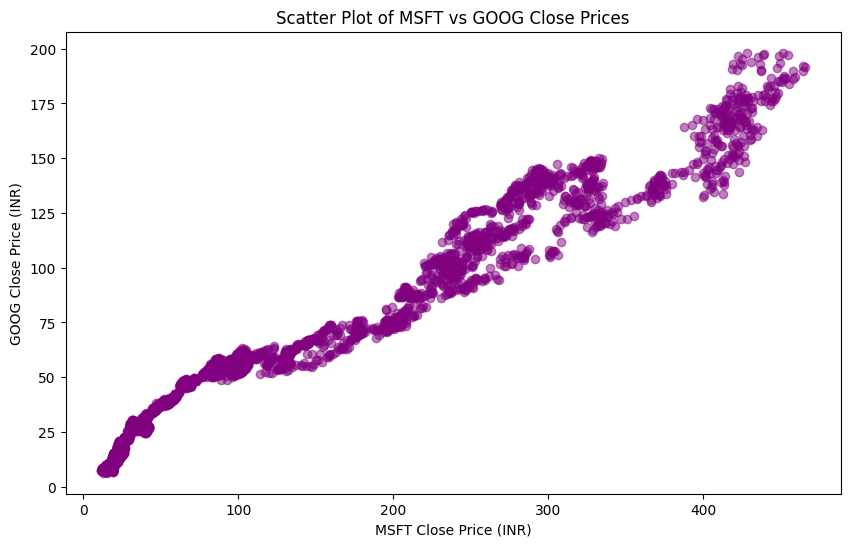

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(data_msft['Close'], data_goog['Close'], alpha=0.5, color='purple')
plt.title('Scatter Plot of MSFT vs GOOG Close Prices')
plt.xlabel('MSFT Close Price (INR)')
plt.ylabel('GOOG Close Price (INR)')
plt.show()


## STATIONARITY OF DATA

- Stationarity is essential for accurate and reliable time series forecasting. - Non-stationary data can lead to poor model performance and inaccurate predictions.
- ADF Test is used to check for stationarity. A significant p-value indicates that the series is stationary.

Techniques to Achieve Stationarity:
- Differencing removes trends.
- Log Transformation stabilizes variance.
- De-Trending removes long-term trends.
- De-Seasonalizing removes seasonal patterns.

1. ADF (Augmented Dickey-Fuller test) 

Null Hypothesis (H₀): The time series has a unit root (non-stationary).
Alternative Hypothesis (H₁): The time series is stationary.

p-value < 0.05: Reject H₀, meaning the series is stationary.

p-value ≥ 0.05: Fail to reject H₀ meaning the series is non-stationary.

In [95]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on MSFT Close prices
adf_result_msft = adfuller(data_msft['Close'])

# Extracting test statistics
adf_statistic_msft = adf_result_msft[0]
p_value_msft = adf_result_msft[1]
critical_values_msft = adf_result_msft[4]

print(f"ADF Statistic: {adf_statistic_msft:.4f}")
print(f"P-Value: {p_value_msft:.4f}")
print("Critical Values:")
for key, value in critical_values_msft.items():
    print(f"{key}: {value:.4f}")

# Interpretation
if p_value_msft < 0.05:
    print("Reject the null hypothesis: The series is stationary.")
else:
    print("Fail to reject the null hypothesis: The series is non-stationary.")


ADF Statistic: 2.4769
P-Value: 0.9990
Critical Values:
1%: -3.4317
5%: -2.8621
10%: -2.5671
Fail to reject the null hypothesis: The series is non-stationary.


2. First Order Differencing

ADF Statistic (Differenced Data - MSFT): -13.4687
P-Value (Differenced Data - MSFT): 0.0000


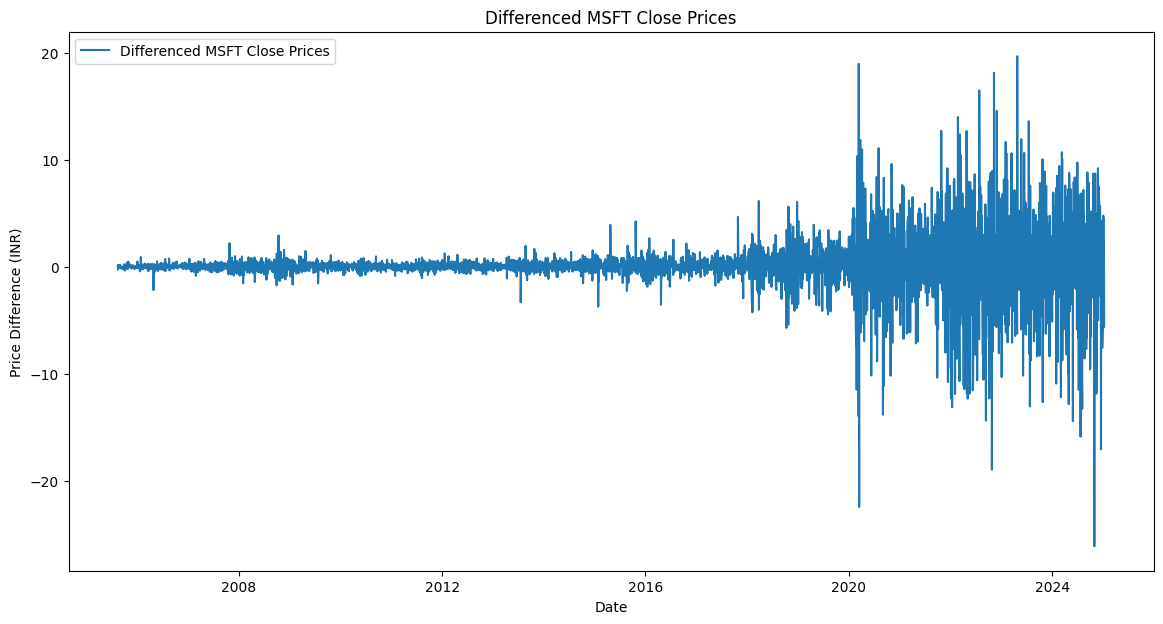

In [96]:
# Apply first-order differencing to MSFT Close prices
data_msft['Close_diff'] = data_msft['Close'].diff().dropna()

# Re-run the ADF test on differenced data
adf_result_diff_msft = adfuller(data_msft['Close_diff'].dropna())

print(f"ADF Statistic (Differenced Data - MSFT): {adf_result_diff_msft[0]:.4f}")
print(f"P-Value (Differenced Data - MSFT): {adf_result_diff_msft[1]:.4f}")

# Plot the differenced data
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close_diff'], label='Differenced MSFT Close Prices')
plt.title('Differenced MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference (INR)')
plt.legend()
plt.show()


3. Log Transformation

ADF Statistic (Log Transformed Data - MSFT): 0.9188
P-Value (Log Transformed Data - MSFT): 0.9933


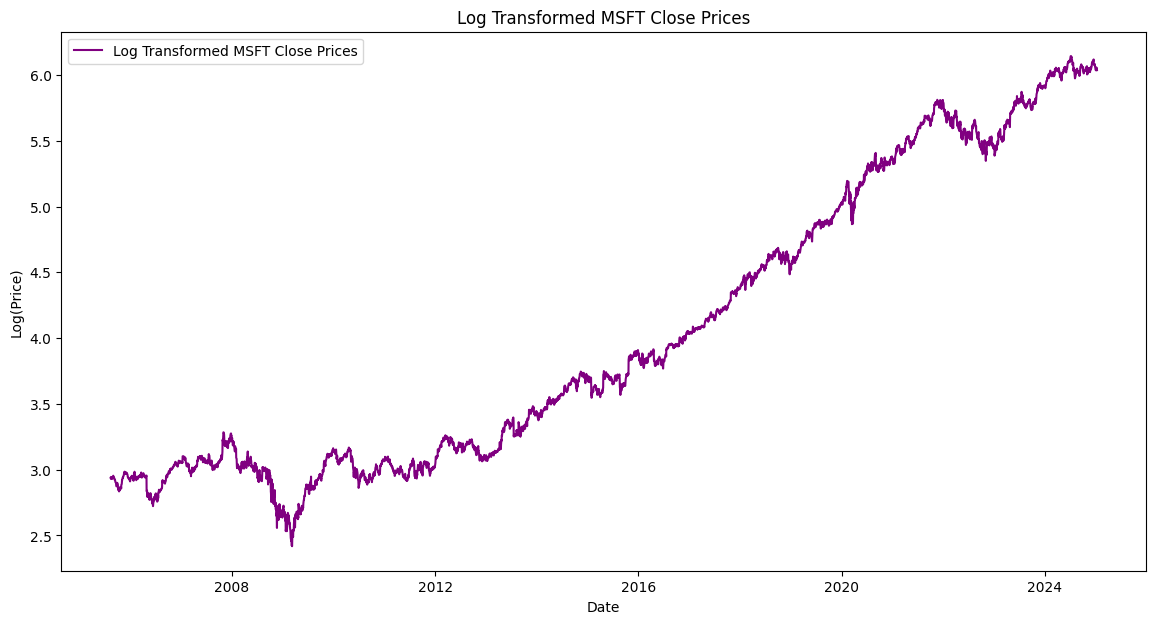

In [97]:
# Apply log transformation to MSFT Close prices
data_msft['Close_log'] = np.log(data_msft['Close'])

# Re-run the ADF test on log-transformed data
adf_result_log_msft = adfuller(data_msft['Close_log'].dropna())

print(f"ADF Statistic (Log Transformed Data - MSFT): {adf_result_log_msft[0]:.4f}")
print(f"P-Value (Log Transformed Data - MSFT): {adf_result_log_msft[1]:.4f}")

# Plot the log-transformed data
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close_log'], label='Log Transformed MSFT Close Prices', color='purple')
plt.title('Log Transformed MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.show()


4. DE-TRENDING DATA BY SUBTRACTING ROLLING MEAN

A rolling mean (also called a moving average) is a statistical technique used to smooth out short-term fluctuations and highlight longer-term trends in a dataset, particularly in time series data. The rolling mean is calculated by taking the average of a fixed window

ADF Statistic (Differenced Data): -12.3338
P-Value (Differenced Data): 0.0000


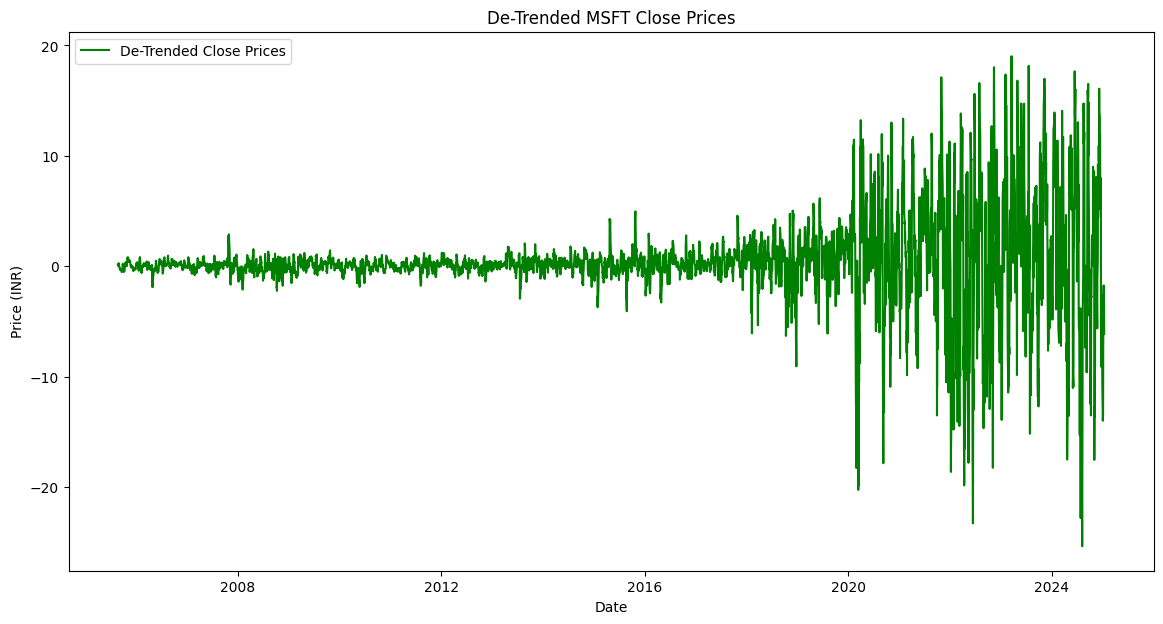

In [98]:
# De-trend by subtracting the rolling mean
rolling_mean = data_msft['Close'].rolling(window=10).mean()
data_msft['Close_detrended'] = data_msft['Close'] - rolling_mean

# Re-run the ADF test on differenced data
adf_result_detrended = adfuller(data_msft['Close_detrended'].dropna())

print(f"ADF Statistic (Differenced Data): {adf_result_detrended[0]:.4f}")
print(f"P-Value (Differenced Data): {adf_result_detrended[1]:.4f}")

# Plot the de-trended data
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close_detrended'], label='De-Trended Close Prices', color='green')
plt.title('De-Trended MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

5. DE-SEASONALIZING DATA

Deseasonalizing data using seasonal decomposition involves separating a time series into its key components (trend, seasonality, and residuals) to remove the seasonal effects.

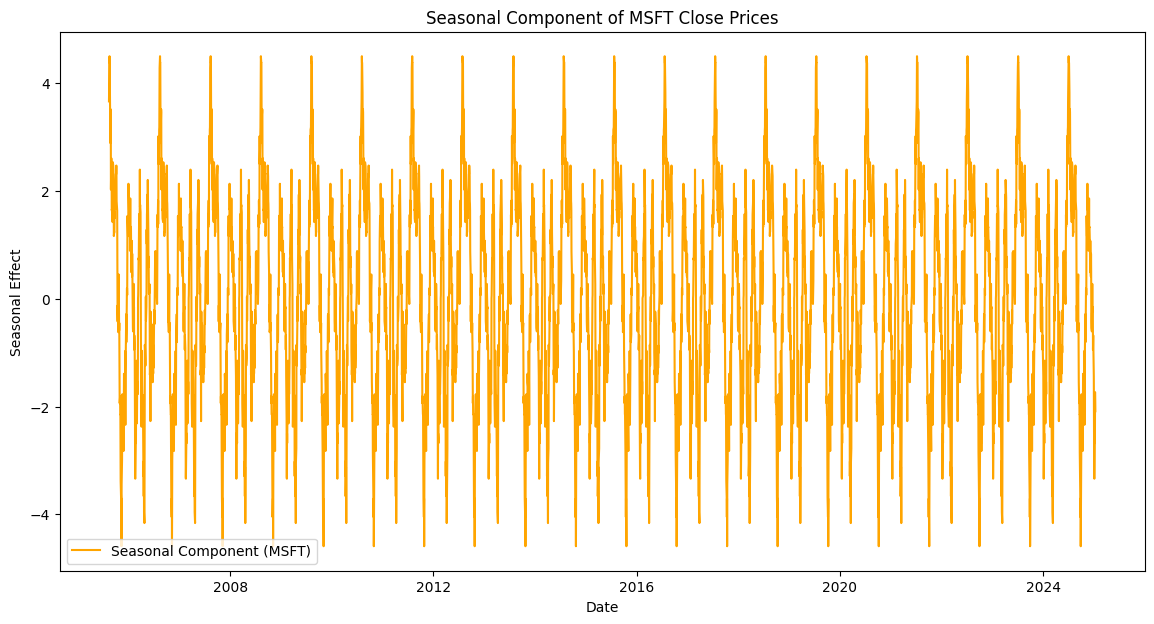

ADF Statistic (De-seasonalized Data - MSFT): 2.6092
P-Value (De-seasonalized Data - MSFT): 0.9991


In [99]:
# De-seasonalizing using seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition_msft = seasonal_decompose(data_msft['Close'], model='additive', period=250)

# Extract and plot the seasonal component
seasonal_msft = decomposition_msft.seasonal
plt.figure(figsize=(14, 7))
plt.plot(seasonal_msft, label='Seasonal Component (MSFT)', color='orange')
plt.title('Seasonal Component of MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()

# De-seasonalized data (original - seasonal component)
data_msft['Close_deseasonalized'] = data_msft['Close'] - seasonal_msft

# Re-run the ADF test on de-seasonalized data
adf_result_deseasonalized_msft = adfuller(data_msft['Close_deseasonalized'].dropna())

print(f"ADF Statistic (De-seasonalized Data - MSFT): {adf_result_deseasonalized_msft[0]:.4f}")
print(f"P-Value (De-seasonalized Data - MSFT): {adf_result_deseasonalized_msft[1]:.4f}")


- First Differencing: Often enough to remove trends and achieve stationarity, as confirmed by both the ADF and KPSS tests.
- Second Differencing: Applied if first differencing is insufficient; should achieve stationarity in most cases.
- Detrending: Removes the trend component, making the series stationary if the trend is the primary cause of non-stationarity.
- Logarithmic Transformation: Stabilizes the variance, useful for data exhibiting exponential growth or increasing variance over time.

## CHARACTERISTICS OF TIME SERIES DATA:

1. VOLATILITY CLUSTERING- Periods of high volatility i.e. high fluctuations

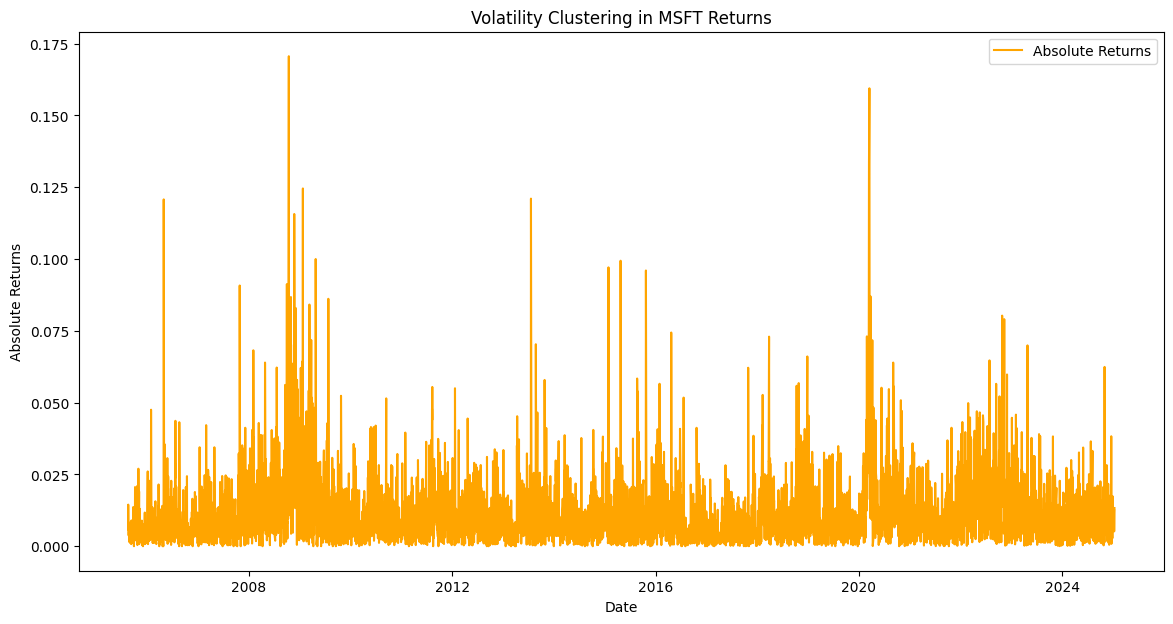

In [100]:
# Calculate daily returns
data_msft['Returns'] = np.log(1+data_msft['Close'].pct_change())

# Plot the absolute returns to visualize volatility clustering
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Returns'].abs(), color='orange', label='Absolute Returns')
plt.title('Volatility Clustering in MSFT Returns')
plt.xlabel('Date')
plt.ylabel('Absolute Returns')
plt.legend()
plt.show()


2. NOISE- Filtering out noise (unwanted data) is essential for building accurate forecasting models.

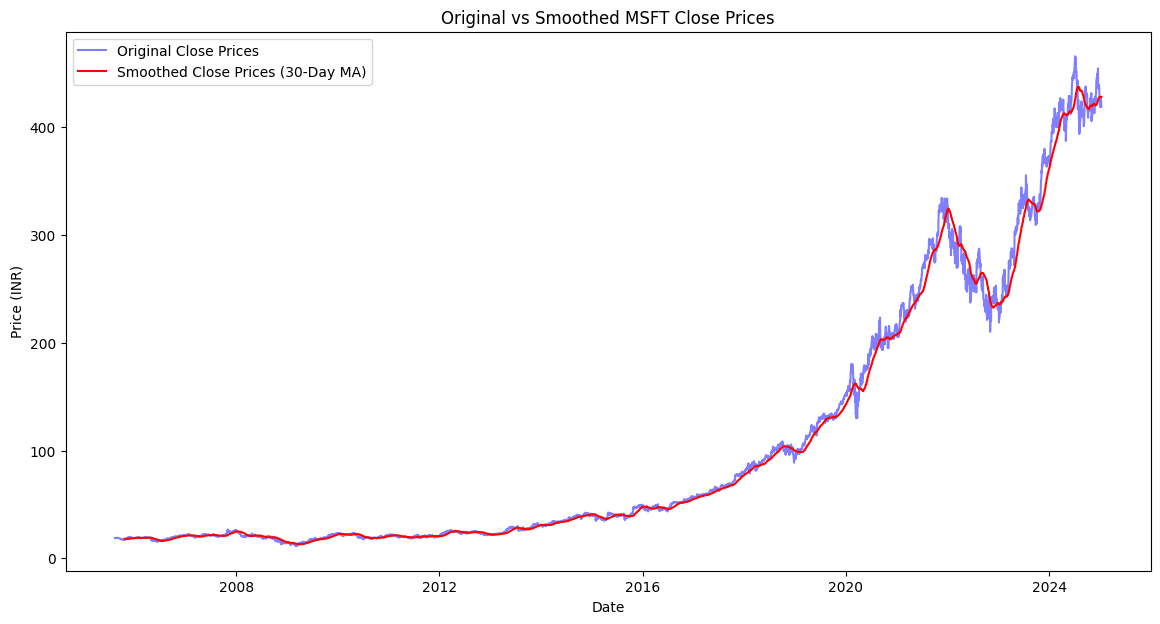

In [101]:
# Smooth the time series using a rolling mean
data_msft['Smoothed_Close'] = data_msft['Close'].rolling(window=50).mean()

# Plot the original and smoothed series
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close'], label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(data_msft['Smoothed_Close'], label='Smoothed Close Prices (30-Day MA)', color='red')
plt.title('Original vs Smoothed MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


3. FAT TAILS- Distributions of returns with fatter tails than a normal distribution, indicating a higher likelihood of extreme events.

Indicates high kurtosis

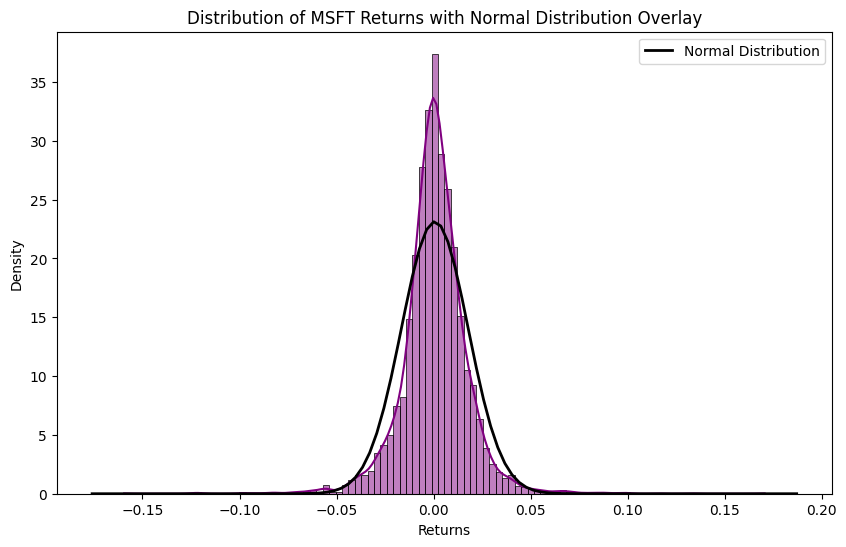

In [102]:
import scipy.stats as stats

# Plot the distribution of MSFT returns
plt.figure(figsize=(10, 6))
sns.histplot(data_msft['Returns'].dropna(), bins=100, kde=True, color='purple', stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data_msft['Returns'].mean(), data_msft['Returns'].std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Distribution of MSFT Returns with Normal Distribution Overlay')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

4. AUTOCORRELATION- The correlation of a time series with a lagged version of itself

<Figure size 1200x600 with 0 Axes>

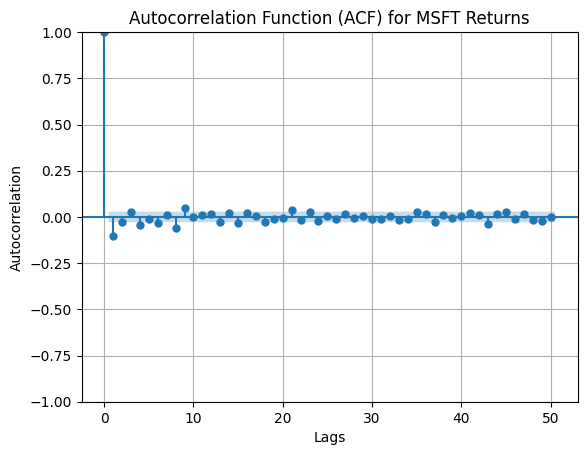

<Figure size 1200x600 with 0 Axes>

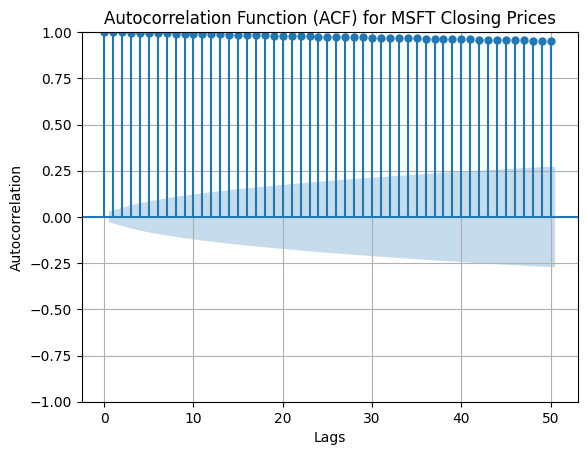

In [103]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for MSFT Returns
plt.figure(figsize=(12, 6))
plot_acf(data_msft['Returns'].dropna(), lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for MSFT Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot ACF for MSFT Price
plt.figure(figsize=(12, 6))
plot_acf(data_msft['Close'].dropna(), lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) for MSFT Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


5. MEAN REVERSION

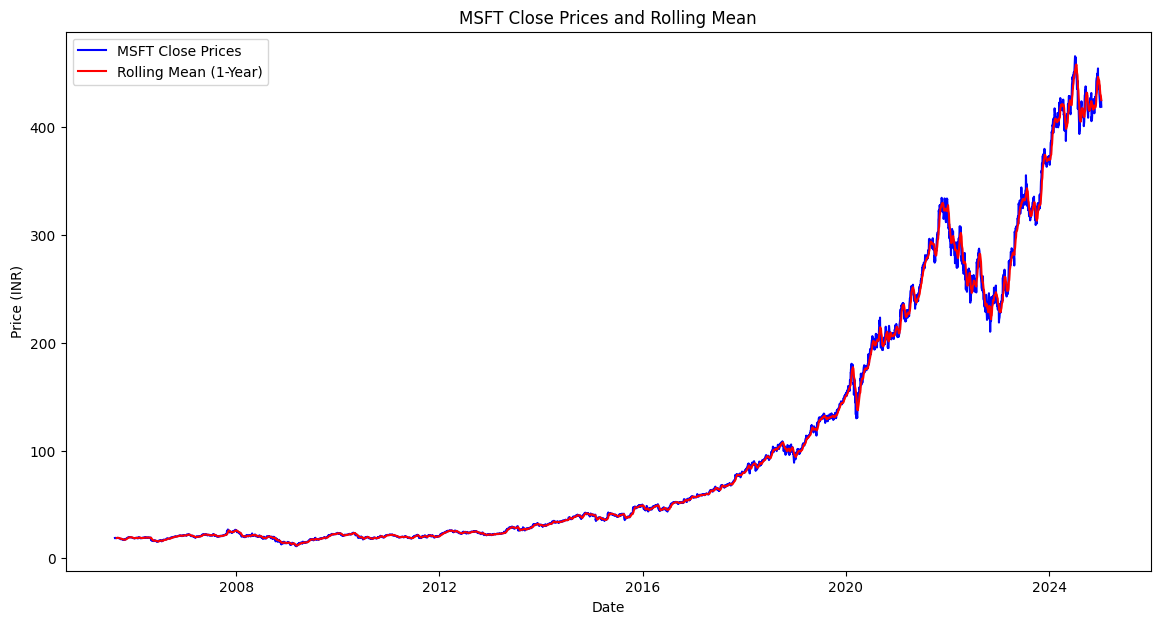

In [104]:
plt.figure(figsize=(14, 7))
plt.plot(data_msft['Close'], label='MSFT Close Prices', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (1-Year)', color='red')
plt.title('MSFT Close Prices and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

6. NON-STATIONARITY (Done above)- Financial time series often exhibit non-stationarity due to trends, seasonality, or structural breaks. These characteristics must be addressed before applying certain forecasting models.

## DATA PRE-PROCESSING TECHINQUES

1. REMOVING MISSING VALUES- Essential to avoid biases in the model. Techniques include deletion, imputation, and interpolation.

In [105]:
missing_data = data_msft.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Price
Close                    0
High                     0
Low                      0
Open                     0
Volume                   0
Close_diff               1
Close_log                0
Close_detrended          9
Close_deseasonalized     0
Returns                  1
Smoothed_Close          49
dtype: int64


In [106]:
# Drop rows with missing values
data_msft_cleaned = data_msft.dropna()

print("Missing values after deletion:\n", data_msft_cleaned.isnull().sum())

Missing values after deletion:
 Price
Close                   0
High                    0
Low                     0
Open                    0
Volume                  0
Close_diff              0
Close_log               0
Close_detrended         0
Close_deseasonalized    0
Returns                 0
Smoothed_Close          0
dtype: int64


In [107]:
# Fill missing values using forward fill method
data_msft_ffill = data_msft.fillna(method='ffill')

# Fill missing values using backward fill method as a fallback
data_msft_bfill = data_msft_ffill.fillna(method='bfill')

# Fill missing values using interpolation
data_msft_interpolated = data_msft_bfill.interpolate(method='linear')

# Choose the method and finalize the dataset
data_msft_final = data_msft_interpolated.copy()

# Confirm missing values are handled
print("Missing values after imputation:\n", data_msft_final.isnull().sum())

Missing values after imputation:
 Price
Close                   0
High                    0
Low                     0
Open                    0
Volume                  0
Close_diff              0
Close_log               0
Close_detrended         0
Close_deseasonalized    0
Returns                 0
Smoothed_Close          0
dtype: int64


In [108]:
data_msft_final

Price,Close,High,Low,Open,Volume,Close_diff,Close_log,Close_detrended,Close_deseasonalized,Returns,Smoothed_Close
Date,,,,,,,,,,,
2005-08-12,18.889053,18.951901,18.784308,18.910003,52006500,0.112057,2.938583,0.094552,15.224369,0.005915,18.170194
2005-08-15,19.001110,19.120173,18.692947,18.896054,45976600,0.112057,2.944497,0.094552,14.715706,0.005915,18.170194
2005-08-16,18.727962,19.008111,18.699948,18.931071,46894600,-0.273148,2.930018,0.094552,14.224776,-0.014480,18.170194
2005-08-17,18.875050,19.015123,18.671941,18.784000,52413100,0.147087,2.937841,0.094552,14.493909,0.007823,18.170194
2005-08-18,18.783997,18.966094,18.769989,18.833022,40861900,-0.091053,2.933005,0.094552,14.401319,-0.004836,18.170194
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03,423.350006,424.029999,419.540009,421.079987,16662900,4.770020,6.048199,-7.160989,426.689454,0.011331,428.109595
2025-01-06,427.850006,434.320007,425.480011,428.000000,20573600,4.500000,6.058773,-1.742990,430.348342,0.010573,428.191559
2025-01-07,422.369995,430.649994,420.799988,429.000000,18139100,-5.480011,6.045882,-5.800000,425.048974,-0.012891,428.161328


OUTLIERS USING Z-SCORE

Number of outliers detected by Z-Score: 1


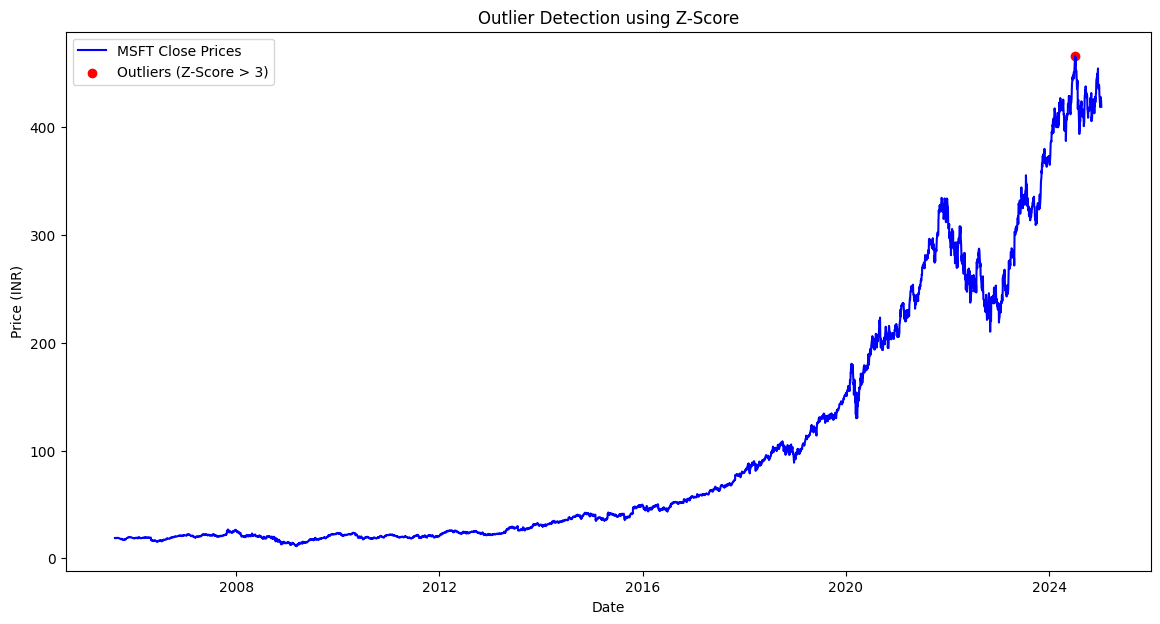

In [109]:
from scipy import stats

# Calculate Z-scores
data_msft_final['Z-Score'] = np.abs(stats.zscore(data_msft_final['Close']))

# Define a threshold to identify outliers (e.g., Z-score > 3)
outliers_z = data_msft_final[data_msft_final['Z-Score'] > 3]
print(f"Number of outliers detected by Z-Score: {len(outliers_z)}")

# Plot to visualize outliers
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.scatter(outliers_z.index, outliers_z['Close'], color='red', label='Outliers (Z-Score > 3)')
plt.title('Outlier Detection using Z-Score')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

OUTLIERS USING INTERQUARTILE RANGE

Number of outliers detected by IQR method: 289


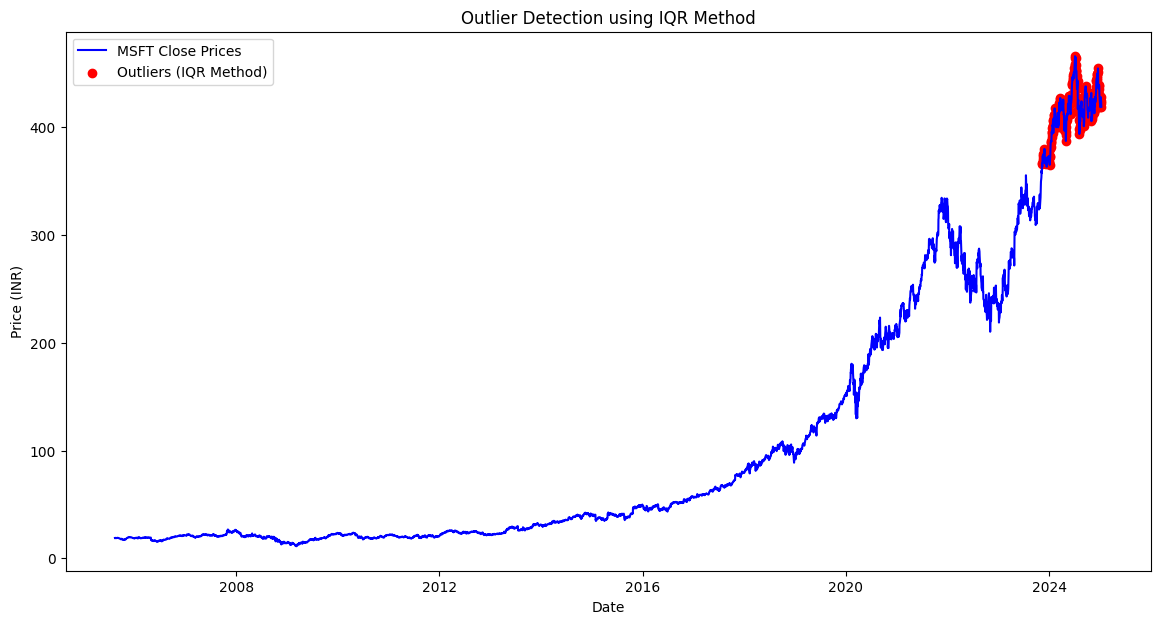

In [110]:
# Calculate IQR
Q1 = data_msft_final['Close'].quantile(0.25)
Q3 = data_msft_final['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on IQR
outliers_iqr = data_msft_final[(data_msft_final['Close'] < (Q1 - 1.5 * IQR)) | (data_msft_final['Close'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers detected by IQR method: {len(outliers_iqr)}")

# Plot to visualize outliers
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.scatter(outliers_iqr.index, outliers_iqr['Close'], color='red', label='Outliers (IQR Method)')
plt.title('Outlier Detection using IQR Method')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

2. REMOVAL OF OUTLIERS

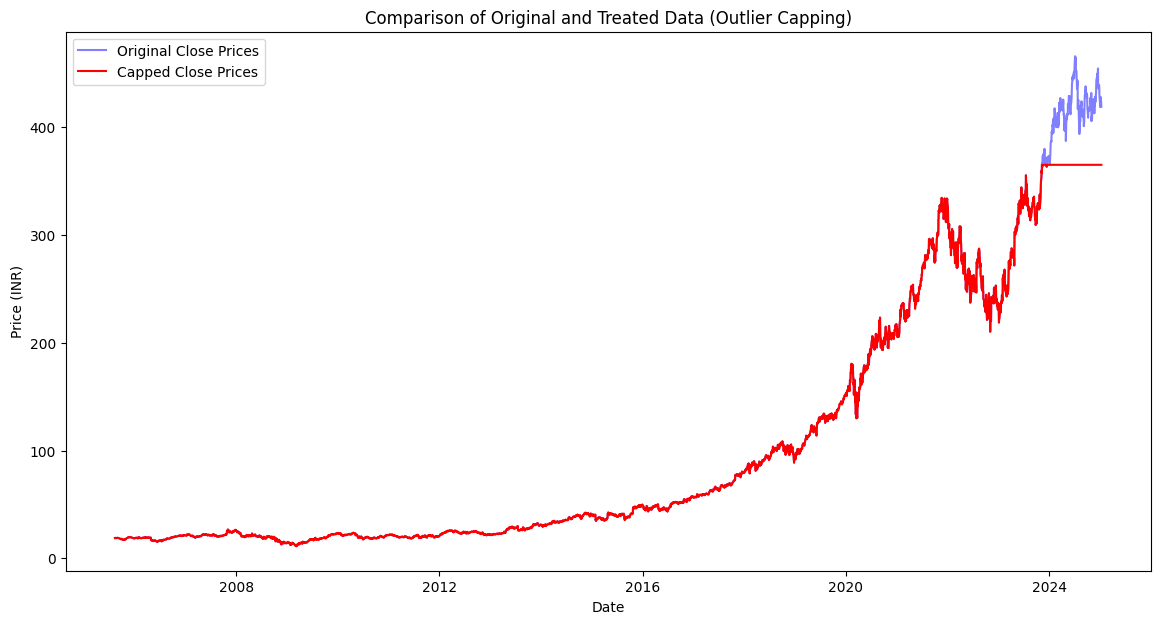

In [111]:
# Option 1: Remove outliers 
data_MSFT_outliers_removed = data_msft_final[(data_msft_final['Close'] >= (Q1 - 1.5 * IQR)) & (data_msft_final['Close'] <= (Q3 + 1.5 * IQR))]

# Option 2: Cap outliers
capped_values = data_msft_final['Close'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

# Plot to compare the original vs. treated data
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='Original Close Prices', color='blue', alpha=0.5)
plt.plot(capped_values, label='Capped Close Prices', color='red')
plt.title('Comparison of Original and Treated Data (Outlier Capping)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


3. NORMALIZATION- Key for rescaling data, especially when dealing with features of different scales or units.

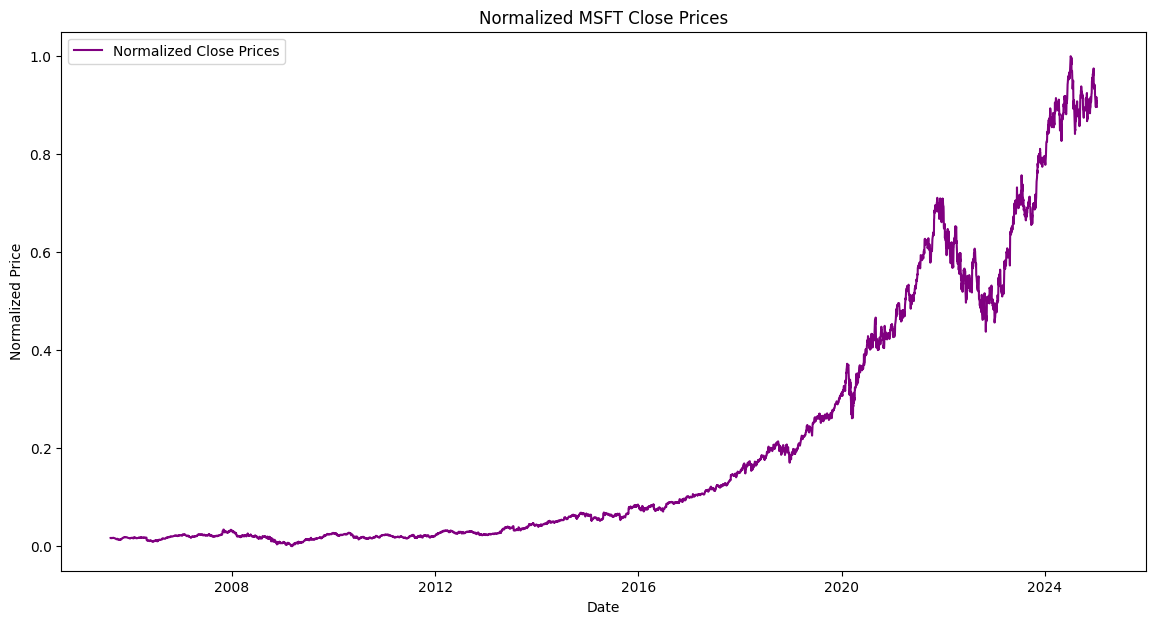

In [112]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_MSFT_normalized = scaler.fit_transform(data_msft_final[['Close']])

# Plot the normalized data
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final.index, data_MSFT_normalized, label='Normalized Close Prices', color='purple')
plt.title('Normalized MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


4. STANDERDIZATION- Key for rescaling data, especially when dealing with features of different scales or units.

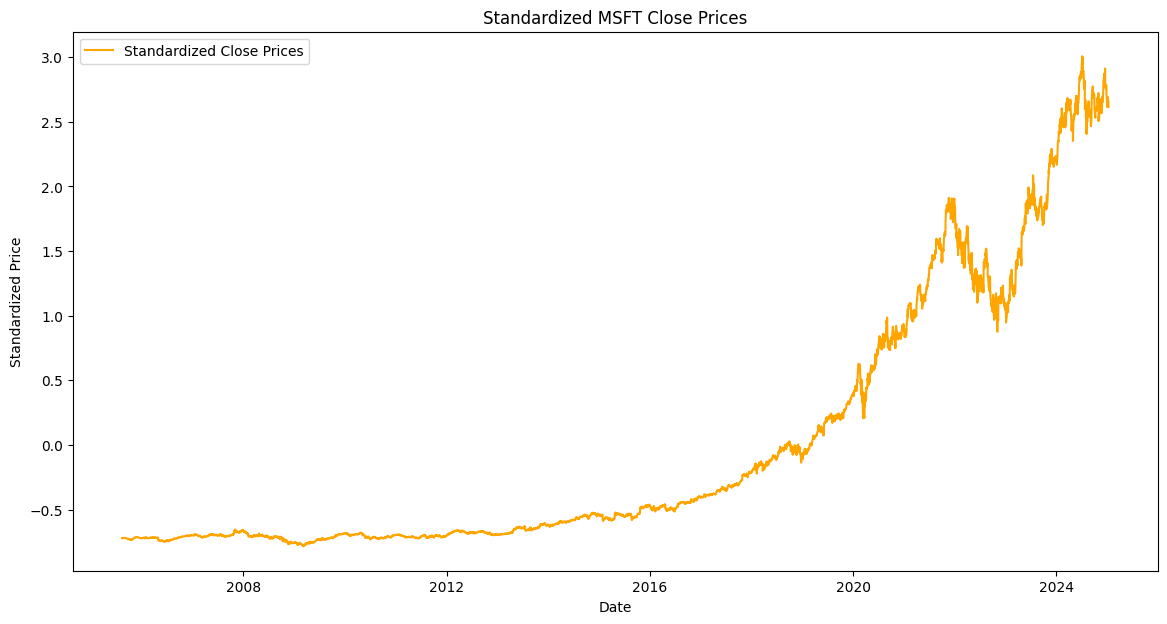

In [113]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
data_MSFT_standardized = scaler.fit_transform(data_msft_final[['Close']])

# Plot the standardized data
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final.index, data_MSFT_standardized, label='Standardized Close Prices', color='orange')
plt.title('Standardized MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend()
plt.show()

5. LAGGED VARIABLES CREATION: Critical for capturing temporal dependencies in time series forecasting.

In [114]:
# Create lagged features (e.g., 1-day, 2-day, and 3-day lags)
data_msft_final['Lag_1'] = data_msft_final['Close'].shift(1)
data_msft_final['Lag_2'] = data_msft_final['Close'].shift(2)
data_msft_final['Lag_3'] = data_msft_final['Close'].shift(3)

# Drop NA values generated by shifting
data_msft_final = data_msft_final.dropna()

# Display the first few rows to show lagged variables
print(data_msft_final[['Close', 'Lag_1', 'Lag_2', 'Lag_3']].head())

Price           Close      Lag_1      Lag_2      Lag_3
Date                                                  
2005-08-17  18.875050  18.727962  19.001110  18.889053
2005-08-18  18.783997  18.875050  18.727962  19.001110
2005-08-19  18.713964  18.783997  18.875050  18.727962
2005-08-22  18.847038  18.713964  18.783997  18.875050
2005-08-23  18.819023  18.847038  18.713964  18.783997


6. REMOVE TRENDS

Differencing: A technique used to achieve stationarity by removing trends or seasonality in time series data.

C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\2041064236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_msft_final['Differenced'] = data_msft_final['Close'].diff()


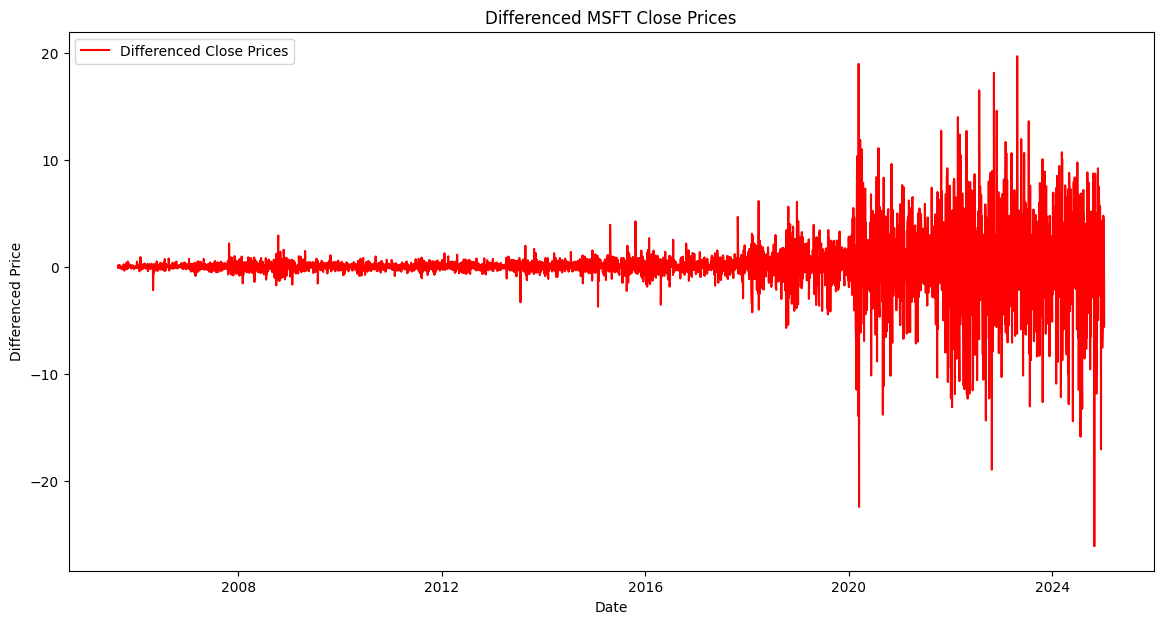

In [115]:
# Apply differencing to remove trends
data_msft_final['Differenced'] = data_msft_final['Close'].diff()

# Plot the differenced data
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final.index, data_msft_final['Differenced'], label='Differenced Close Prices', color='red')
plt.title('Differenced MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()


ROLLING MEAN AND ROLLING STANDARD DEVIATION

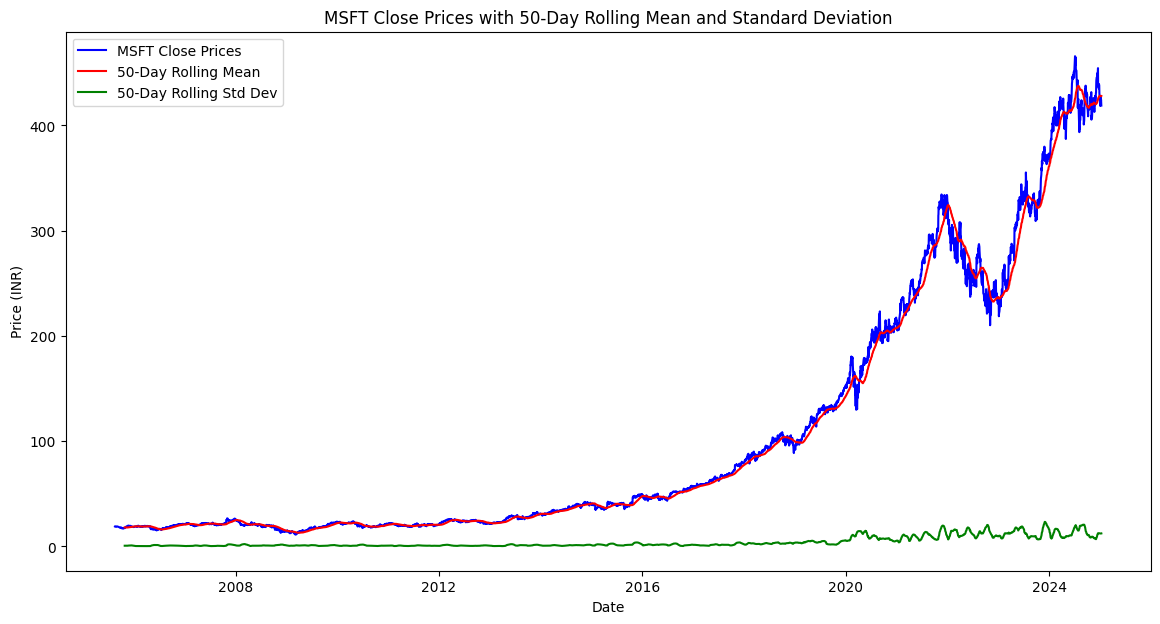

In [116]:
# Calculate rolling mean and standard deviation (e.g., 50-day rolling window)
rolling_mean_50 = data_msft_final['Close'].rolling(window=50).mean()
rolling_std_50 = data_msft_final['Close'].rolling(window=50).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(rolling_mean_50, label='50-Day Rolling Mean', color='red')
plt.plot(rolling_std_50, label='50-Day Rolling Std Dev', color='green')
plt.title('MSFT Close Prices with 50-Day Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


ROLLING VARIANCE

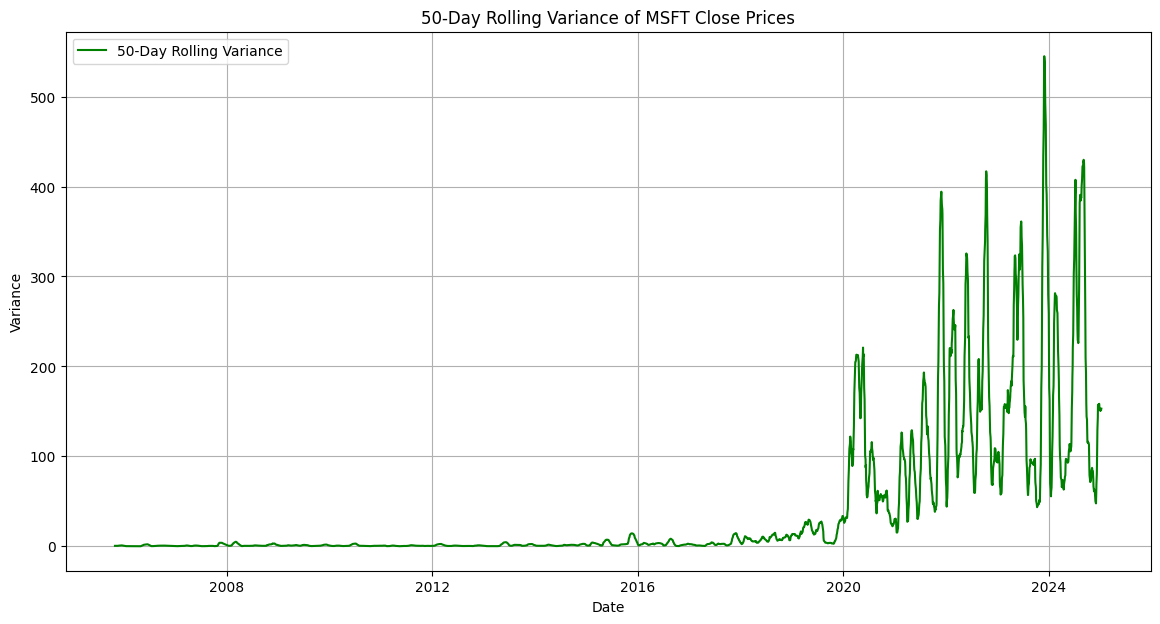

In [117]:
rolling_variance = data_msft_final['Close'].rolling(window=50).var()
plt.figure(figsize=(14, 7))
plt.plot(rolling_variance, label='50-Day Rolling Variance', color='green')
plt.title('50-Day Rolling Variance of MSFT Close Prices')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

TIME SERIES DECOMPOSITION

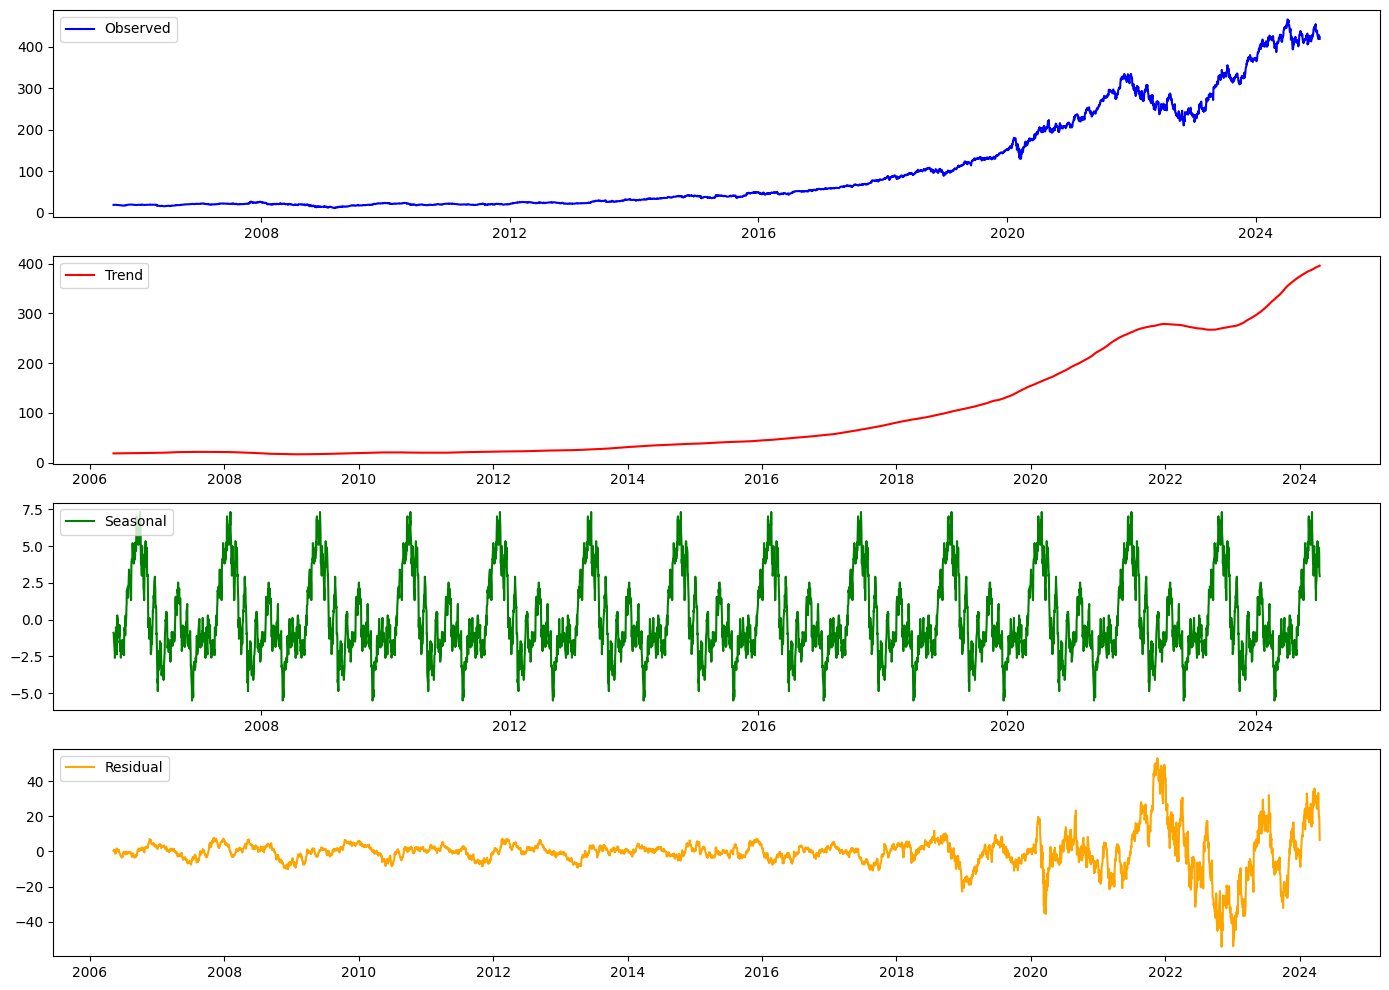

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result_additive = seasonal_decompose(data_msft_final['Close'], model='additive', period=365)

# Plot the decomposition results
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result_additive.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_additive.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_additive.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_additive.resid, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


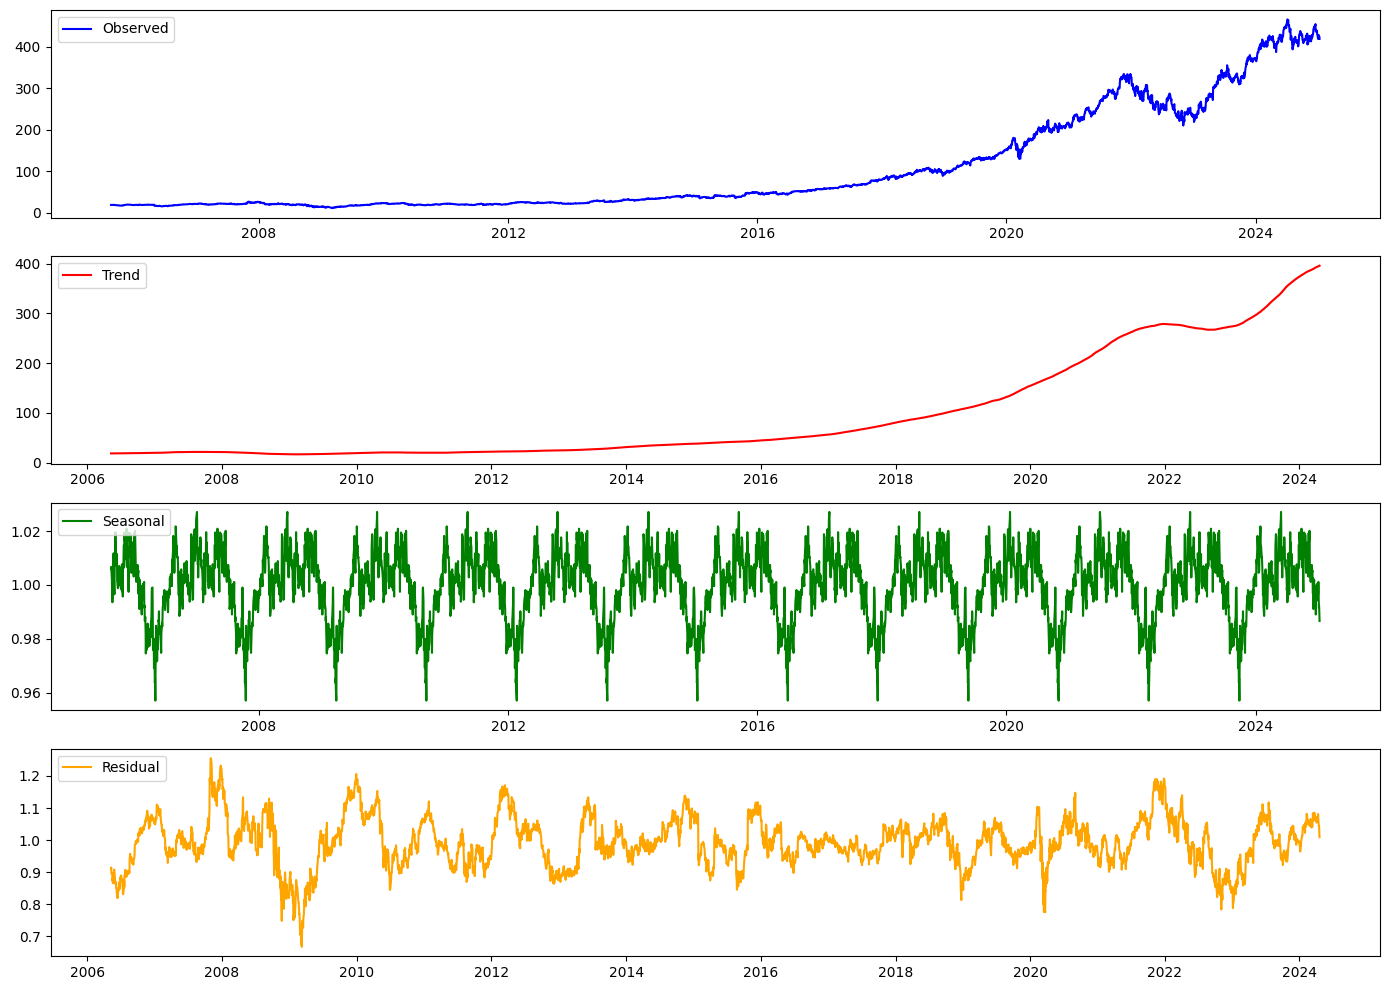

In [119]:
# Perform multiplicative decomposition
result_multiplicative = seasonal_decompose(data_msft_final['Close'], model='multiplicative', period=365)

# Plot the decomposition results
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result_multiplicative.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_multiplicative.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_multiplicative.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_multiplicative.resid, label='Residual', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


- Additive Model: Suitable for data where seasonal variations are constant over time. The observed series is the sum of the trend, seasonal, and residual components.
- Multiplicative Model: Suitable for data where seasonal variations change in amplitude over time. The observed series is the product of the trend, seasonal, and residual components.
- Purpose: Decomposition helps in isolating the individual components of a time series, leading to better insights and more accurate forecasting.

## MOVING AVERAGES AND SMOOTHENING TECHNIQUES

SIMPLE MOVING AVERAGE- A basic technique for smoothing data to identify trends, using a fixed window of data points.

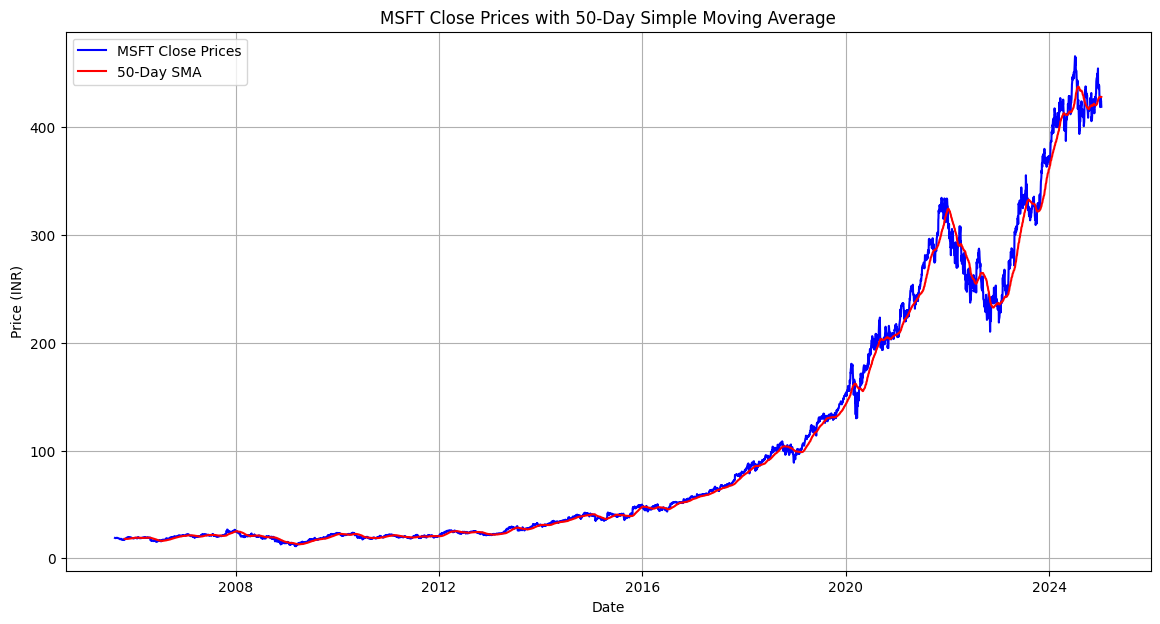

In [120]:
# Calculate 50-day Simple Moving Average (SMA)
sma_50 = data_msft_final['Close'].rolling(window=50).mean()

# Plot the SMA
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(sma_50, label='50-Day SMA', color='red')
plt.title('MSFT Close Prices with 50-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


EXPONENTIAL MOVING AVERAGE- More responsive to recent changes, useful in scenarios where the latest data is more relevant.

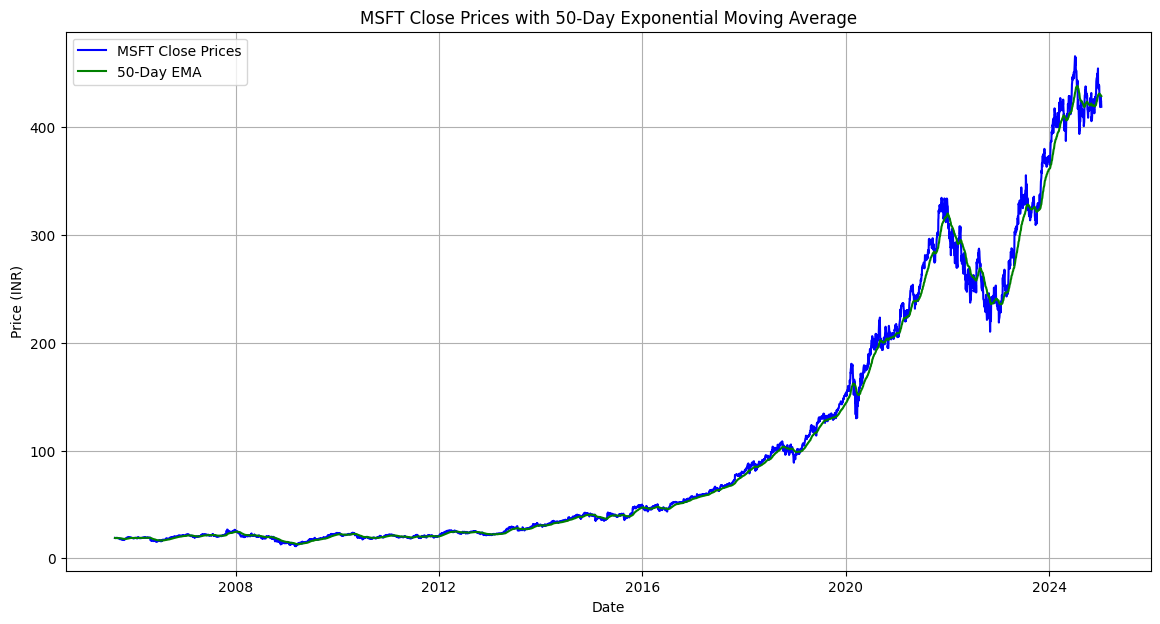

In [121]:
# Calculate 50-day Exponential Moving Average (EMA)
ema_50 = data_msft_final['Close'].ewm(span=50, adjust=False).mean()

# Plot the EMA
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(ema_50, label='50-Day EMA', color='green')
plt.title('MSFT Close Prices with 50-Day Exponential Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


WEIGHTED MOVING AVERAGE- Assigns different levels of importance to data points, emphasizing more recent observations.

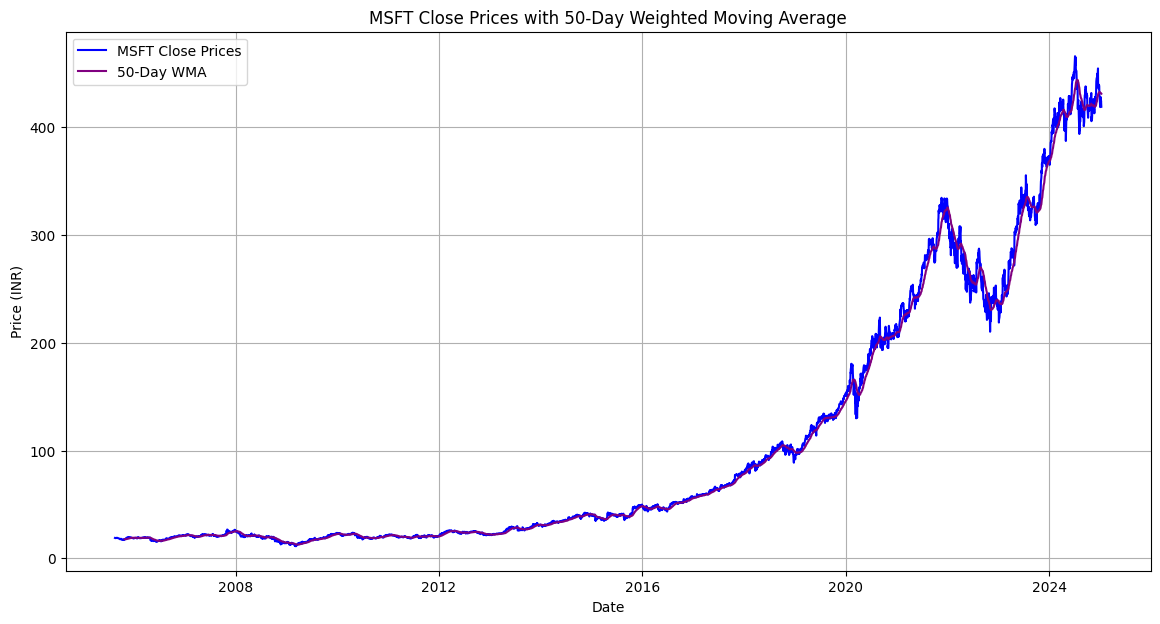

In [122]:
# Function to calculate Weighted Moving Average
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

# Calculate 50-day Weighted Moving Average (WMA)
wma_50 = weighted_moving_average(data_msft_final['Close'], window=50)

# Plot the WMA
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(wma_50, label='50-Day WMA', color='purple')
plt.title('MSFT Close Prices with 50-Day Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


LOESS SMOOTHENING- Non-parametric, locally weighted smoothing that helps uncover trends in non-linear data.

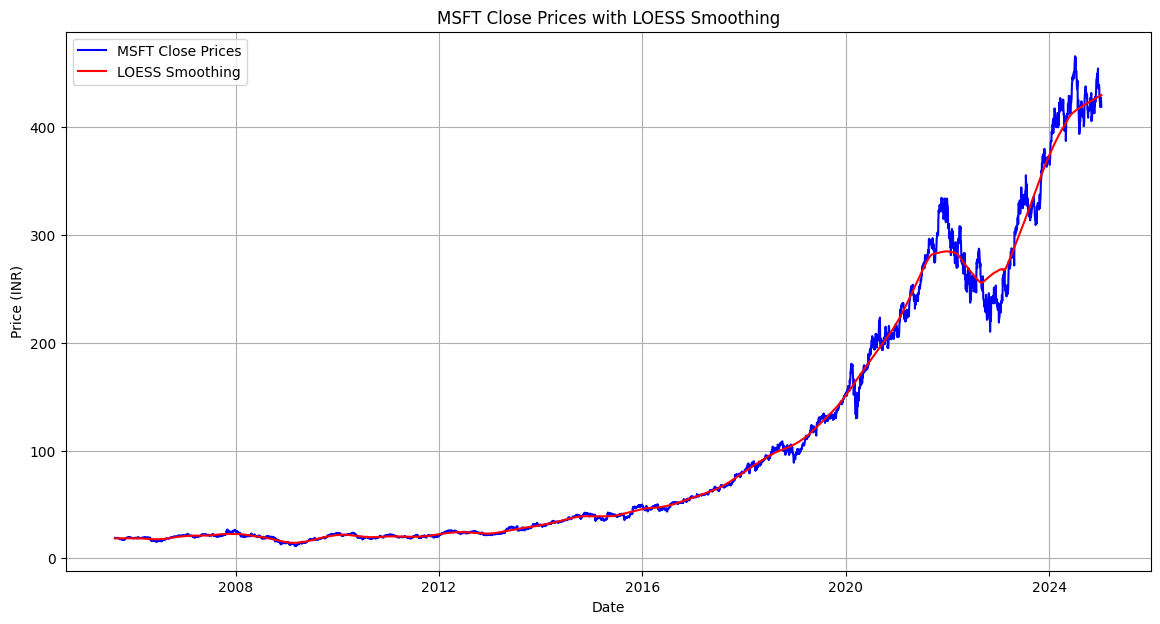

In [123]:
import statsmodels.api as sm

# Apply LOESS smoothing
lowess = sm.nonparametric.lowess(data_msft_final['Close'], data_msft_final.index, frac=0.05)

# Plot the LOESS smoothing
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(data_msft_final.index, lowess[:, 1], label='LOESS Smoothing', color='red')
plt.title('MSFT Close Prices with LOESS Smoothing')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


EXPONENTIAL SMOOTHENING- A family of smoothing methods (including simple, double, and triple) that are widely used for short-term forecasting, particularly when dealing with trend and seasonality.

C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


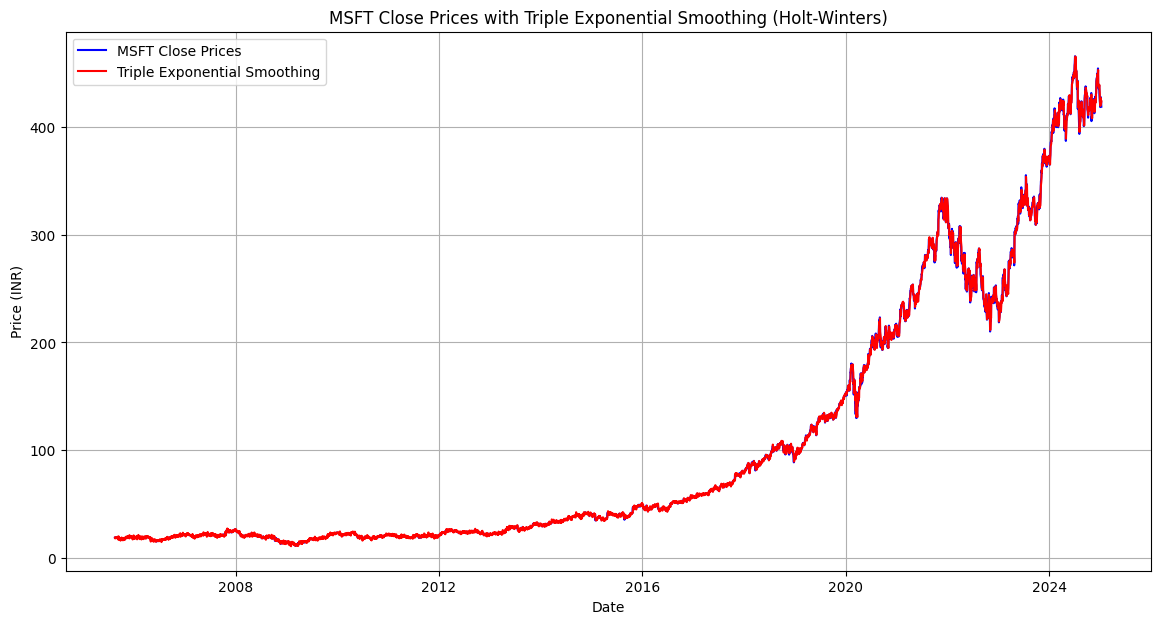

In [124]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Triple Exponential Smoothing (Holt-Winters method)
triple_exp_smoothing = ExponentialSmoothing(data_msft_final['Close'],
                                            trend='add', # Try with "mul"
                                            seasonal='add',# Try with "mul"
                                            seasonal_periods=365).fit()

# Plot the original series and the smoothed series
plt.figure(figsize=(14, 7))
plt.plot(data_msft_final['Close'], label='MSFT Close Prices', color='blue')
plt.plot(triple_exp_smoothing.fittedvalues, label='Triple Exponential Smoothing', color='red')
plt.title('MSFT Close Prices with Triple Exponential Smoothing (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


## TESTS FOR STATIONARITY

For a staionary data, its statistical properties (mean, variance, autocorrelation etc.) should remain constant over time.

In [125]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' prices of MSFT
adf_result = adfuller(data_msft_final['Close'])

# Output the test results
print("ADF Test Statistic: ", adf_result[0])
print("p-value: ", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")

# Interpretation based on p-value
if adf_result[1] < 0.05:
    print("Reject the null hypothesis (H0): The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The time series is non-stationary.")


ADF Test Statistic:  2.4748538325908607
p-value:  0.9990412904638198
Critical Values:
	1%: -3.4316993019432824
	5%: -2.862136241466824
	10%: -2.5670873807578265
Fail to reject the null hypothesis (H0): The time series is non-stationary.


KPSS TEST-

KPSS test assumes the series is stationary under the null hypothesis and tests for stationarity around a deterministic trend.

In [126]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test on the 'Close' prices of MSFT
kpss_result, kpss_pvalue, _, kpss_crit = kpss(data_msft_final['Close'], regression='c')

# Output the test results
print("KPSS Test Statistic: ", kpss_result)
print("p-value: ", kpss_pvalue)
print("Critical Values:")
for key, value in kpss_crit.items():
    print(f"\t{key}: {value}")

# Interpretation based on p-value
if kpss_pvalue < 0.05:
    print("Reject the null hypothesis (H0): The time series is non-stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The time series is stationary.")


KPSS Test Statistic:  8.757681641039582
p-value:  0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Reject the null hypothesis (H0): The time series is non-stationary.


C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\3094915994.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result, kpss_pvalue, _, kpss_crit = kpss(data_msft_final['Close'], regression='c')


ADF and KPSS are often used together to confirm stationarity. If they give contradictory results, the series may be trend-stationary.

In [127]:
# Interpret both tests together
if adf_result[1] < 0.05 and kpss_pvalue >= 0.05:
    print("The series is likely stationary.")
elif adf_result[1] >= 0.05 and kpss_pvalue < 0.05:
    print("The series is likely non-stationary.")
elif adf_result[1] < 0.05 and kpss_pvalue < 0.05:
    print("The series may be trend-stationary (stationary after detrending).")
else:
    print("Results are inconclusive. Further investigation is needed.")


The series is likely non-stationary.


## ACHIEVING STATIONARITY

C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\2336157593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_msft_final['First_Diff'] = data_msft_final['Close'].diff()
C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\2336157593.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_msft_final['Second_Diff'] = data_msft_final['First_Diff'].diff()


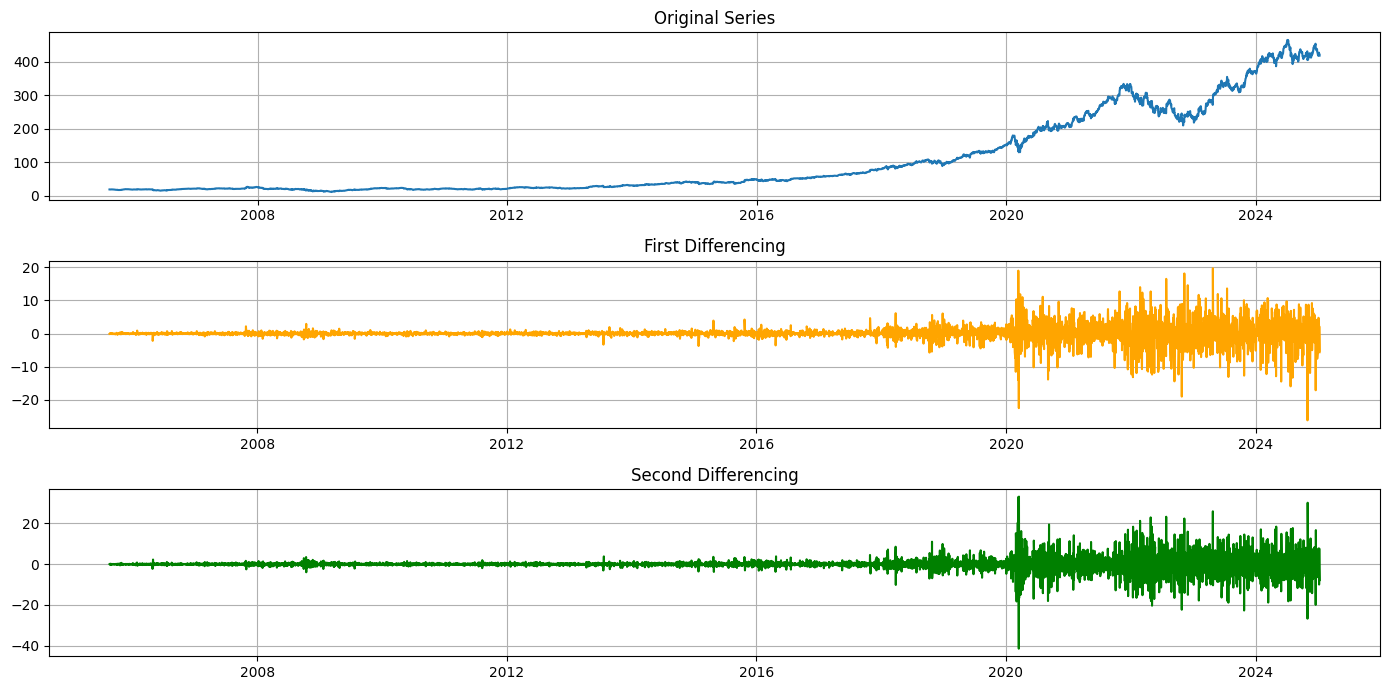

In [128]:
# First differencing
data_msft_final['First_Diff'] = data_msft_final['Close'].diff()

# Second differencing (if necessary)
data_msft_final['Second_Diff'] = data_msft_final['First_Diff'].diff()

# Plotting the original series and the differenced series
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(data_msft_final['Close'], label='Original Series')
plt.title('Original Series')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data_msft_final['First_Diff'], label='First Differencing', color='orange')
plt.title('First Differencing')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data_msft_final['Second_Diff'], label='Second Differencing', color='green')
plt.title('Second Differencing')
plt.grid(True)

plt.tight_layout()
plt.show()


In [129]:
# Perform ADF test on the first differenced series
adf_result_diff1 = adfuller(data_msft_final['First_Diff'].dropna())
print("ADF Test on First Differencing")
print("ADF Test Statistic: ", adf_result_diff1[0])
print("p-value: ", adf_result_diff1[1])
print("Critical Values:")
for key, value in adf_result_diff1[4].items():
    print(f"\t{key}: {value}")
if adf_result_diff1[1] < 0.05:
    print("The first differenced series is stationary based on the ADF test.\n")
else:
    print("The first differenced series is not stationary based on the ADF test.\n")

# Perform KPSS test on the first differenced series
kpss_result_diff1, kpss_pvalue_diff1, _, kpss_crit_diff1 = kpss(data_msft_final['First_Diff'].dropna(), regression='c')
print("KPSS Test on First Differencing")
print("KPSS Test Statistic: ", kpss_result_diff1)
print("p-value: ", kpss_pvalue_diff1)
print("Critical Values:")
for key, value in kpss_crit_diff1.items():
    print(f"\t{key}: {value}")
if kpss_pvalue_diff1 < 0.05:
    print("The first differenced series is non-stationary based on the KPSS test.\n")
else:
    print("The first differenced series is stationary based on the KPSS test.\n")


ADF Test on First Differencing
ADF Test Statistic:  -13.464908515460138
p-value:  3.4717085935671965e-25
Critical Values:
	1%: -3.4316993019432824
	5%: -2.862136241466824
	10%: -2.5670873807578265
The first differenced series is stationary based on the ADF test.

KPSS Test on First Differencing
KPSS Test Statistic:  0.6981544201669028
p-value:  0.013713234530281565
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The first differenced series is non-stationary based on the KPSS test.



In [130]:
# Perform ADF test on the second differenced series
adf_result_diff2 = adfuller(data_msft_final['Second_Diff'].dropna())
print("ADF Test on Second Differencing")
print("ADF Test Statistic: ", adf_result_diff2[0])
print("p-value: ", adf_result_diff2[1])
print("Critical Values:")
for key, value in adf_result_diff2[4].items():
    print(f"\t{key}: {value}")
if adf_result_diff2[1] < 0.05:
    print("The second differenced series is stationary based on the ADF test.\n")
else:
    print("The second differenced series is not stationary based on the ADF test.\n")

# Perform KPSS test on the second differenced series
kpss_result_diff2, kpss_pvalue_diff2, _, kpss_crit_diff2 = kpss(data_msft_final['Second_Diff'].dropna(), regression='c')
print("KPSS Test on Second Differencing")
print("KPSS Test Statistic: ", kpss_result_diff2)
print("p-value: ", kpss_pvalue_diff2)
print("Critical Values:")
for key, value in kpss_crit_diff2.items():
    print(f"\t{key}: {value}")
if kpss_pvalue_diff2 < 0.05:
    print("The second differenced series is non-stationary based on the KPSS test.\n")
else:
    print("The second differenced series is stationary based on the KPSS test.\n")


ADF Test on Second Differencing
ADF Test Statistic:  -21.45187033744456
p-value:  0.0
Critical Values:
	1%: -3.4316998589961156
	5%: -2.862136487566397
	10%: -2.567087511766811
The second differenced series is stationary based on the ADF test.

KPSS Test on Second Differencing
KPSS Test Statistic:  0.0396585506632157
p-value:  0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The second differenced series is stationary based on the KPSS test.



C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\3993536823.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff2, kpss_pvalue_diff2, _, kpss_crit_diff2 = kpss(data_msft_final['Second_Diff'].dropna(), regression='c')


In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_msft_final['Close'], model='additive', period=365)
trend = decomposition.trend
# Detrend by subtracting the trend component
data_msft_final['Detrended'] = data_msft_final['Close'] - trend
# Perform ADF test on the detrended series
adf_result_detrend = adfuller(data_msft_final['Detrended'].dropna())
print("ADF Test on Detrended Series")
print("ADF Test Statistic: ", adf_result_detrend[0])
print("p-value: ", adf_result_detrend[1])
print("Critical Values:")
for key, value in adf_result_detrend[4].items():
    print(f"\t{key}: {value}")
if adf_result_detrend[1] < 0.05:
    print("The detrended series is stationary based on the ADF test.\n")
else:
    print("The detrended series is not stationary based on the ADF test.\n")

# Perform KPSS test on the detrended series
kpss_result_detrend, kpss_pvalue_detrend, _, kpss_crit_detrend = kpss(data_msft_final['Detrended'].dropna(), regression='c')
print("KPSS Test on Detrended Series")
print("KPSS Test Statistic: ", kpss_result_detrend)
print("p-value: ", kpss_pvalue_detrend)
print("Critical Values:")
for key, value in kpss_crit_detrend.items():
    print(f"\t{key}: {value}")
if kpss_pvalue_detrend < 0.05:
    print("The detrended series is non-stationary based on the KPSS test.\n")
else:
    print("The detrended series is stationary based on the KPSS test.\n")


C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\1423917028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_msft_final['Detrended'] = data_msft_final['Close'] - trend


ADF Test on Detrended Series
ADF Test Statistic:  -5.399508184859285
p-value:  3.3952697195552253e-06
Critical Values:
	1%: -3.431808873276874
	5%: -2.862184647943413
	10%: -2.5671131496789124
The detrended series is stationary based on the ADF test.

KPSS Test on Detrended Series
KPSS Test Statistic:  0.04351423092134254
p-value:  0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The detrended series is stationary based on the KPSS test.



C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\1423917028.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_detrend, kpss_pvalue_detrend, _, kpss_crit_detrend = kpss(data_msft_final['Detrended'].dropna(), regression='c')


In [132]:
# Apply Logarithmic Transformation
data_msft_final['Log_Transformed'] = np.log(data_msft_final['Close'])
# Perform ADF test on the log-transformed series
adf_result_log = adfuller(data_msft_final['Log_Transformed'].dropna())
print("ADF Test on Log-Transformed Series")
print("ADF Test Statistic: ", adf_result_log[0])
print("p-value: ", adf_result_log[1])
print("Critical Values:")
for key, value in adf_result_log[4].items():
    print(f"\t{key}: {value}")
if adf_result_log[1] < 0.05:
    print("The log-transformed series is stationary based on the ADF test.\n")
else:
    print("The log-transformed series is not stationary based on the ADF test.\n")

# Perform KPSS test on the log-transformed series
kpss_result_log, kpss_pvalue_log, _, kpss_crit_log = kpss(data_msft_final['Log_Transformed'].dropna(), regression='c')
print("KPSS Test on Log-Transformed Series")
print("KPSS Test Statistic: ", kpss_result_log)
print("p-value: ", kpss_pvalue_log)
print("Critical Values:")
for key, value in kpss_crit_log.items():
    print(f"\t{key}: {value}")
if kpss_pvalue_log < 0.05:
    print("The log-transformed series is non-stationary based on the KPSS test.\n")
else:
    print("The log-transformed series is stationary based on the KPSS test.\n")


C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\3591225744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_msft_final['Log_Transformed'] = np.log(data_msft_final['Close'])


ADF Test on Log-Transformed Series
ADF Test Statistic:  0.9221270143488374
p-value:  0.9933724011230652
Critical Values:
	1%: -3.431692928725116
	5%: -2.862133425848621
	10%: -2.567085881888328
The log-transformed series is not stationary based on the ADF test.

KPSS Test on Log-Transformed Series
KPSS Test Statistic:  10.870652301695344
p-value:  0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The log-transformed series is non-stationary based on the KPSS test.



C:\Users\SAKSHI SONI\AppData\Local\Temp\ipykernel_25792\3591225744.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_log, kpss_pvalue_log, _, kpss_crit_log = kpss(data_msft_final['Log_Transformed'].dropna(), regression='c')


- First Differencing: Often enough to remove trends and achieve stationarity, as confirmed by both the ADF and KPSS tests.
- Second Differencing: Applied if first differencing is insufficient; should achieve stationarity in most cases.
- Detrending: Removes the trend component, making the series stationary if the trend is the primary cause of non-stationarity.
- Logarithmic Transformation: Stabilizes the variance, useful for data exhibiting exponential growth or increasing variance over time. It generally does not make the data stationary.

## PREDICTION OF HISTORICAL DATA USING RANDOM FOREST

[*********************100%***********************]  2 of 2 completed


Mean Absolute Error (MAE): 0.002020787846314249
Root Mean Squared Error (RMSE): 0.0029189029844774225


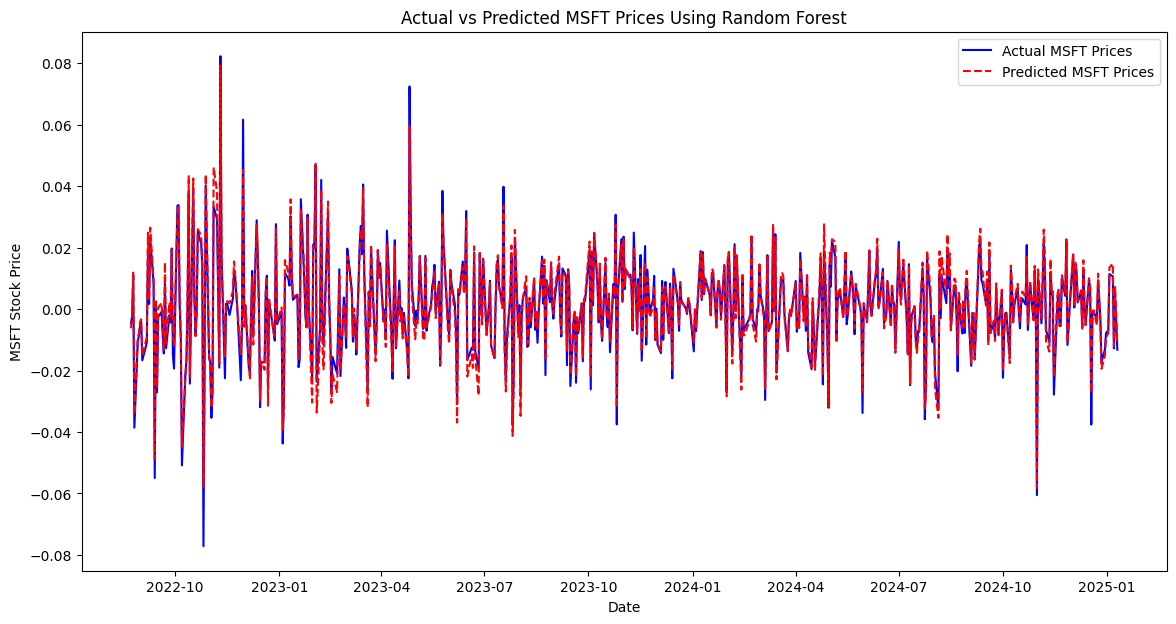

In [133]:
# pip install ta
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import ta
from datetime import date

symbols = ['MSFT', 'GOOG'] 
data = yf.download(symbols, start='2013-01-01', end=date.today())['Close']
data.columns = data.columns.get_level_values(0)
# Drop rows with missing values
data.dropna(inplace=True)

# Calculate daily returns
returns = data.pct_change().dropna()

# Create lag features
lags = [1, 2, 3, 5, 10]  # Lag by 1, 2, 3, 5, 10 days
lagged_features = pd.DataFrame(index=returns.index)

for lag in lags:
    lagged_features[f'MSFT_Lag_{lag}'] = returns['MSFT'].shift(lag)
    for col in ['GOOG']:
        lagged_features[f'{col}_Lag_{lag}'] = returns[col].shift(lag)

# Combine the lagged features with the returns dataframe
data_with_lags = pd.concat([returns, lagged_features], axis=1).dropna()

# Calculate rolling statistics (e.g., 10-day rolling mean and rolling std)
rolling_window = 10
data_with_lags['MSFT_Rolling_Mean'] = returns['MSFT'].rolling(window=rolling_window).mean()
data_with_lags['MSFT_Rolling_Std'] = returns['MSFT'].rolling(window=rolling_window).std()

# Add rolling statistics for other variables as well
for col in ['GOOG']:
    data_with_lags[f'{col}_Rolling_Mean'] = returns[col].rolling(window=rolling_window).mean()
    data_with_lags[f'{col}_Rolling_Std'] = returns[col].rolling(window=rolling_window).std()

# Calculate RSI for MSFT
data_with_lags['MSFT_RSI'] = ta.momentum.rsi(returns['MSFT'], window=14)

# Calculate MACD for MSFT
macd = ta.trend.MACD(returns['MSFT'])
data_with_lags['MSFT_MACD'] = macd.macd()
data_with_lags['MSFT_MACD_Signal'] = macd.macd_signal()

# Drop NaN values that result from technical indicators calculations
data_with_lags.dropna(inplace=True)

# Select the features and the target variable
features = data_with_lags.drop(columns=['MSFT'])
target = data_with_lags['MSFT']

# Standardize the features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual MSFT Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted MSFT Prices', linestyle='--', color='red')
plt.legend()
plt.title('Actual vs Predicted MSFT Prices Using Random Forest')
plt.xlabel('Date')
plt.ylabel('MSFT Stock Price')
plt.show()


## FORCASTING

### ARIMA MODEL- AutoRegressive Integrated Moving Average
ARIMA is best suited for forecasting non-seasonal, stationary data over shorter time periods.

AutoRegressive (AR): Uses past values to predict future values. p: Number of past values (lags) in AR.

Integrated (I): Applies differencing to make the data stationary (i.e., removing trends or seasonality). d: Number of differencing steps for stationarity.

Moving Average (MA): Uses past forecast errors to improve predictions. q: Number of past errors in MA.

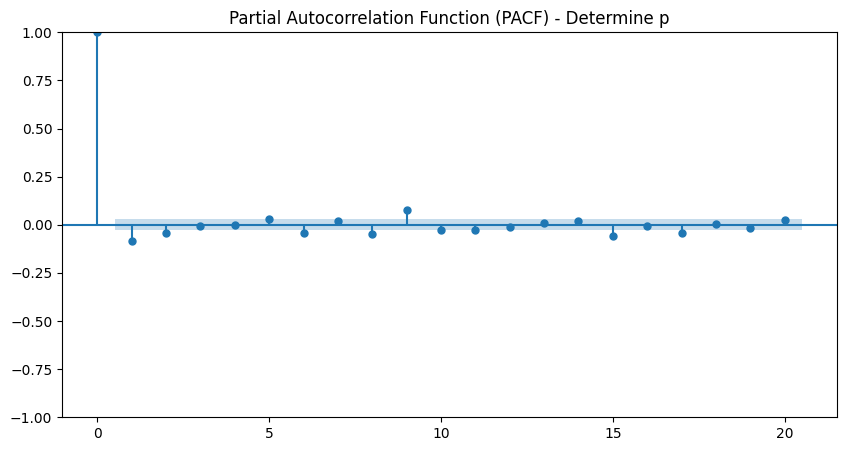

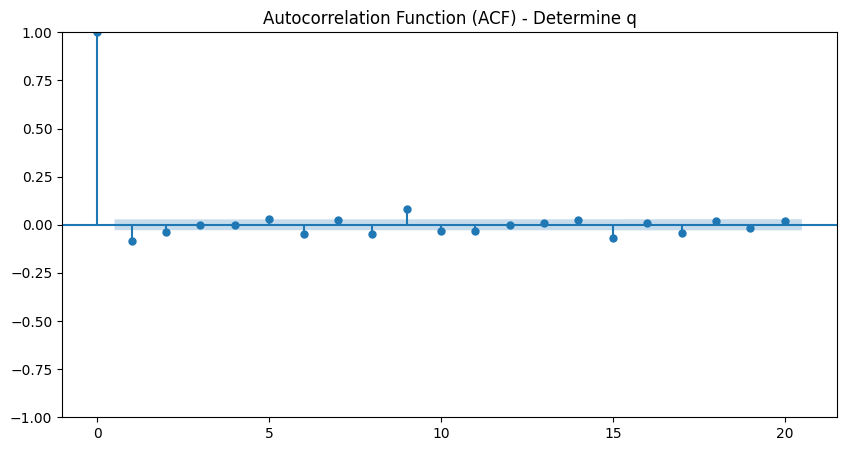

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assume we've already differenced the series
differenced_series = data_msft_final['First_Diff'].dropna()

# Plot PACF to determine p
plt.figure(figsize=(10, 5))
plot_pacf(differenced_series, lags=20, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Determine p')
plt.show()

# Plot ACF to determine q
plt.figure(figsize=(10, 5))
plot_acf(differenced_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Determine q')
plt.show()

In [135]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming p=0, d=1, q=0 based on the ACF/PACF analysis
p = 0
d = 1
q = 0

# Fit the ARIMA model
model = ARIMA(data_msft_final['Close'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4882
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11478.245
Date:                Sun, 12 Jan 2025   AIC                          22958.489
Time:                        15:08:38   BIC                          22964.983
Sample:                             0   HQIC                         22960.768
                               - 4882                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.4582      0.047    137.527      0.000       6.366       6.550
Ljung-Box (L1) (Q):                  33.01   Jarque-Bera (JB):             37727.00
Prob(Q):                              0.00   Pr

C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


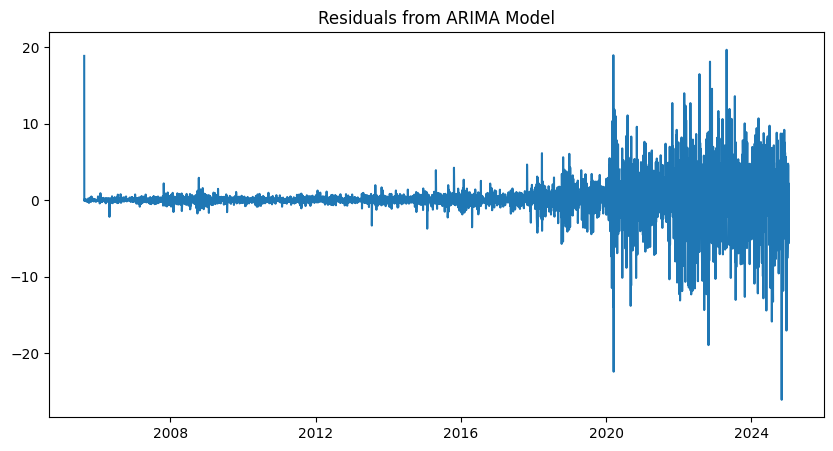

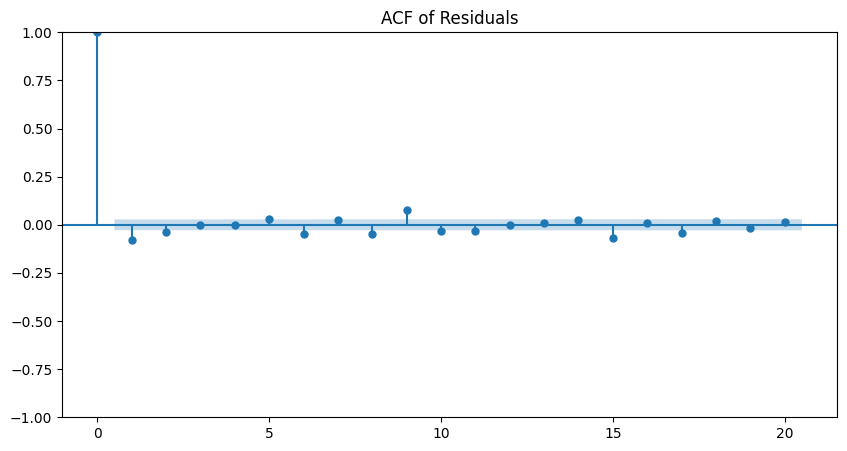

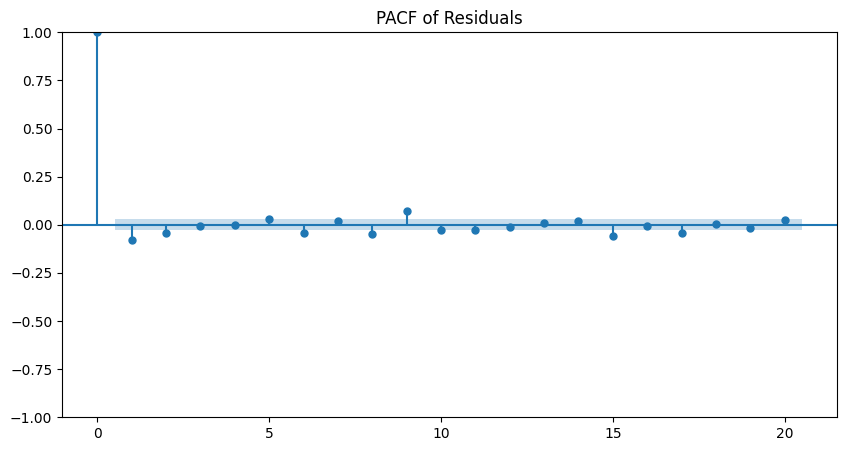

In [136]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=20, method='ywm', ax=plt.gca())
plt.title('PACF of Residuals')
plt.show()


In [137]:
pip install pmdarima

In [138]:
import pmdarima as pm
from pmdarima import auto_arima

In [139]:
time_series = data_msft_final['Close']

In [140]:
# Using auto_arima to find the best fitting ARIMA model
auto_model = auto_arima(time_series,
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        m=1,  # Frequency of the series (m=1 for non-seasonal)
                        seasonal=False,  # Assuming non-seasonal data
                        d=None,  # Let auto_arima determine the value of d
                        trace=True,  # Print the output
                        error_action='ignore',  # Ignore non-fatal errors
                        suppress_warnings=True,  # Suppress warnings
                        stepwise=True)  # Use stepwise approach to search for best parameters

# Print the summary of the model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=26717.479, Time=0.09 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=25176.037, Time=0.22 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=26715.479, Time=0.08 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=24468.957, Time=0.64 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=24095.278, Time=0.61 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=23806.982, Time=0.77 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=23722.292, Time=0.93 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.69 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.30 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0]             : AIC=23720.293, Time=0.49 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0]             : AIC=23804.982, Time=0.37 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.11 sec


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.34 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 26.369 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4882
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -11854.146
Date:                Sun, 12 Jan 2025   AIC                          23720.293
Time:                        15:09:06   BIC                          23759.250
Sample:                             0   HQIC                         23733.963
                               - 4882                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9102      0.007   -135.554      0.000      -0.923     

In [141]:
# Fit the best ARIMA model identified by auto_arima
best_model = auto_model.fit(time_series)

# Print the summary of the best model 
print(best_model.summary())


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4882
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -11854.146
Date:                Sun, 12 Jan 2025   AIC                          23720.293
Time:                        15:09:07   BIC                          23759.250
Sample:                             0   HQIC                         23733.963
                               - 4882                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9102      0.007   -135.554      0.000      -0.923      -0.897
ar.L2         -0.7592      0.010    -79.672      0.000      -0.778      -0.740
ar.L3         -0.5605      0.010    -55.107      0.0

Forecasted values: 4882    419.285012
4883    419.432397
4884    418.195385
4885    416.795887
4886    415.613091
4887    414.409519
4888    413.670872
4889    412.645360
4890    411.483815
4891    410.381896
dtype: float64
Confidence intervals:
[[413.90336121 424.66666284]
 [411.4723489  427.3924454 ]
 [407.7772465  428.61352373]
 [403.69681748 429.89495588]
 [399.5082479  431.71793509]
 [394.81738935 434.00164847]
 [390.28259023 437.05915462]
 [385.39912999 439.89158952]
 [380.20542592 442.76220318]
 [374.86077151 445.90302053]]


C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\SAKSHI SONI\.conda\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


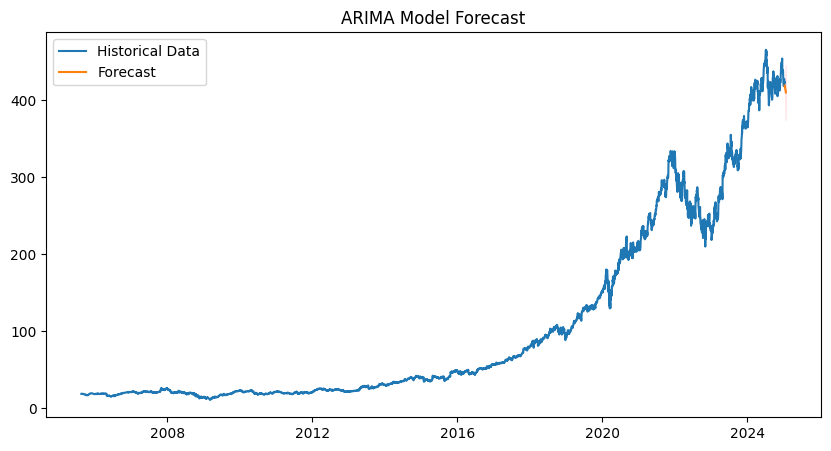

In [142]:
# Forecast the next 10 periods
n_periods = 10
forecast, conf_int = best_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecasted values and confidence intervals
print("Forecasted values:", forecast)
print("Confidence intervals:")
print(conf_int)

# Plot the forecasted values along with the confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(pd.date_range(time_series.index[-1], periods=n_periods, freq='B'), forecast, label='Forecast')
plt.fill_between(pd.date_range(time_series.index[-1], periods=n_periods, freq='B'),
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()
